### Questionnaires (qs.csv) - [One record per questionnaire per question per time point per visit per subject]

This dataset contains info on:
- **EDSS**
- FS scores 
- RAND-36 
- SF-12 
- BDI-II

In [737]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'qs.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
qs = pd.read_csv(file_path)

C:\Users\anaso\AppData\Local\Temp\ipykernel_20944\2053704189.py:17: DtypeWarning: Columns (4,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv(file_path)


Check how many missing values we have per column. 

In [738]:
missing_percentage_qs = (qs.isnull().sum() / len(qs)) * 100
missing_qs = pd.DataFrame({'Column Name': missing_percentage_qs.index, 'Missing Percentage': missing_percentage_qs.values})
missing_qs = missing_qs.sort_values(by='Missing Percentage', ascending=False)
print(missing_qs)

   Column Name  Missing Percentage
29    QSRFTDTC          100.000000
28    QSTPTREF          100.000000
5       QSSPID          100.000000
27      QSELTM          100.000000
26    QSTPTNUM          100.000000
25       QSTPT          100.000000
23       QSDTC          100.000000
11    QSORRESU          100.000000
19      QSEVAL          100.000000
18     QSDRVFL          100.000000
14    QSSTRESU          100.000000
16    QSREASND           99.997550
15      QSSTAT           99.643583
17      QSBLFL           89.925420
22     VISITDY           82.796628
4      QSGRPID           80.735645
30    QSEVLINT           65.621993
9       QSSCAT           59.320312
24        QSDY           24.402110
13    QSSTRESN            0.578733
10     QSORRES            0.476263
12    QSSTRESC            0.356417
1       DOMAIN            0.000000
20    VISITNUM            0.000000
21       VISIT            0.000000
8        QSCAT            0.000000
7       QSTEST            0.000000
6     QSTESTCD      

Remove columns with more than 80% missingness as well as redundant columns.

In [739]:
# Set the threshold for missing percentage
threshold = 80

# Filter columns based on missing percentage
columns_to_drop = missing_qs[missing_qs['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
qs = qs.drop(columns=columns_to_drop)

# Remove redundant columns
qs = qs.drop(columns=['STUDYID', 'DOMAIN', 'QSTESTCD']) #, 'QSORRES'

In [740]:
qs.sort_values(by=['USUBJID', 'QSSEQ'], inplace=True)
qs.head()

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
216853,MSOAC/0014,1,EDSS01-Expanded Disability Score,EDSS,NaN,1,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216854,MSOAC/0014,2,KFSS1-Pyramidal Functions,KFSS,NaN,1,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216855,MSOAC/0014,3,KFSS1-Cerebellar Functions,KFSS,NaN,0,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216856,MSOAC/0014,4,KFSS1-Brain Stem Functions,KFSS,NaN,0,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216857,MSOAC/0014,5,KFSS1-Sensory Functions,KFSS,NaN,0,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **QSTESTCD**: Question Short Name (contains the same info as QSTEST = Question Name)
- **QSORRES**: Finding in Original Units (contains the same info as "QSSTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of QSORRES)
- **QSRFTDTC, QSTPTREF, QSSPID, QSELTM, QSTPTNUM, QSTPT, QSDTC, QSORRESU, QSEVAL, QSDRVFL, QSSTRESU**: all values missing and not even mentioned in the data dictionary 
- **QSREASND**: Reason Not Performed (missing for 99.998% of observations)
- **QSSTAT**: Completion Status (missing for 99.6% of observations)
- **QSBLFL**: Baseline Flag (missing for 89.9% of observations)
- **VISITDY**: Visit Day (missing for 82.8% of observations) -- **maybe keep this one since we also keep it for some other datasets**
- **QSGRPID**: Group ID (missing for 80.7% of observations)

In [741]:
unique_usubjid_count = qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all patients in the dataset for the questionnaires**

Which columns are numeric and categorical? (see also SDTM fields in Data Dictionary)

In [742]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in qs.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,QSSEQ,numeric
2,QSTEST,categorical
3,QSCAT,categorical
4,QSSCAT,categorical
5,QSORRES,categorical
6,QSSTRESC,categorical
7,QSSTRESN,numeric
8,VISITNUM,numeric
9,VISIT,categorical


- Descriptive statistics for numeric variables

In [743]:
numeric_columns = ['QSSEQ', 'QSSTRESN', 'VISITNUM', 'QSDY']

descriptive_numeric = {
    'Count': qs[numeric_columns].count(),
    'Missing Cases': qs[numeric_columns].isna().sum(),
    'Missing %': round((qs[numeric_columns].isna().sum() / len(qs)) * 100, 2),  
    'Median': qs[numeric_columns].median(),
    'Standard Deviation': qs[numeric_columns].std()
}

num_qs = pd.DataFrame(descriptive_numeric)
num_qs

,Count,Missing Cases,Missing %,Median,Standard Deviation
QSSEQ,448912,0,0.00,99.0,79.650454
QSSTRESN,446314,2598,0.58,2.0,1.861824
VISITNUM,448912,0,0.00,20.0,229.172925
QSDY,339368,109544,24.40,253.0,315.596324


- QSSEQ (Sequence number)

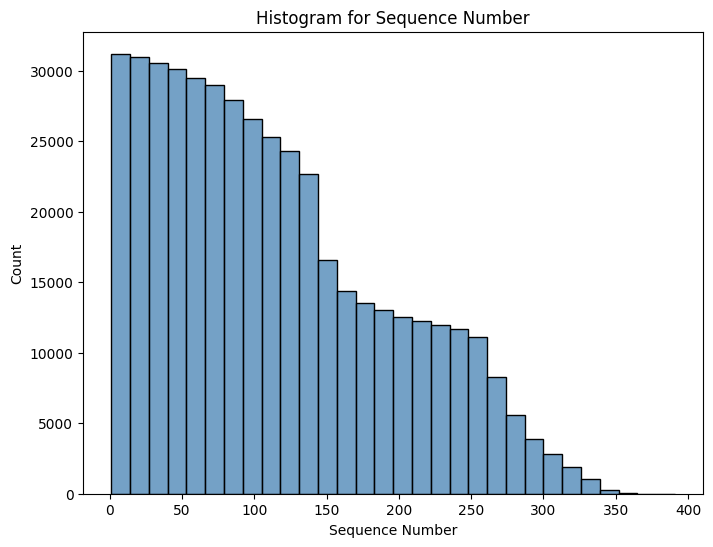

In [744]:
QSSEQ = qs['QSSEQ'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSSEQ, kde=False, color='steelblue', bins=30)
plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Histogram for Sequence Number')
plt.show()

- QSSTRESN (Numeric Finding in Standard Units)

In [745]:
# Filter rows for EDSS
filtered_rows = qs[qs['QSTEST']=='EDSS01-Expanded Disability Score']

# Group by EDSS and USUBJID, then count the number of rows for each group
outcome_measure_counts = filtered_rows.groupby(['QSTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
outcome_measure_counts

,QSTEST,USUBJID,Observation_Count
0,EDSS01-Expanded Disability Score,MSOAC/0014,4
1,EDSS01-Expanded Disability Score,MSOAC/0016,1
2,EDSS01-Expanded Disability Score,MSOAC/0019,14
3,EDSS01-Expanded Disability Score,MSOAC/0024,10
4,EDSS01-Expanded Disability Score,MSOAC/0030,5
...,...,...,...
2460,EDSS01-Expanded Disability Score,MSOAC/9986,5
2461,EDSS01-Expanded Disability Score,MSOAC/9987,16
2462,EDSS01-Expanded Disability Score,MSOAC/9995,20
2463,EDSS01-Expanded Disability Score,MSOAC/9998,14


In [746]:
outcome_measure_counts.groupby('QSTEST')['Observation_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
EDSS01-Expanded Disability Score,2465.0,10.663286,5.024798,1.0,6.0,11.0,14.0,35.0


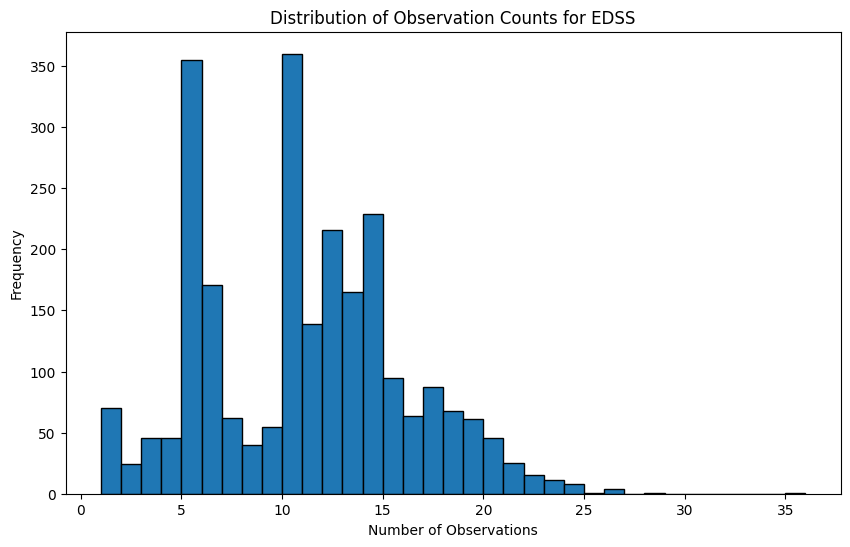

In [747]:
plt.figure(figsize=(10, 6))
plt.hist(outcome_measure_counts['Observation_Count'], bins=range(1, max(outcome_measure_counts['Observation_Count']) + 2), edgecolor='black')
plt.title(f'Distribution of Observation Counts for EDSS')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
plt.show()

- VISITNUM (Visit Number)

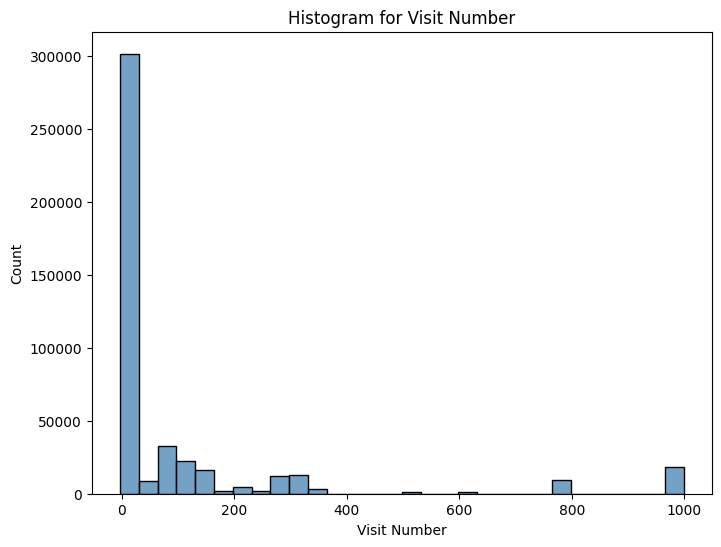

In [748]:
VISITNUM_qs = qs['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITNUM_qs, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Histogram for Visit Number')
plt.show()

- QSDY (Study Day of Collection) 

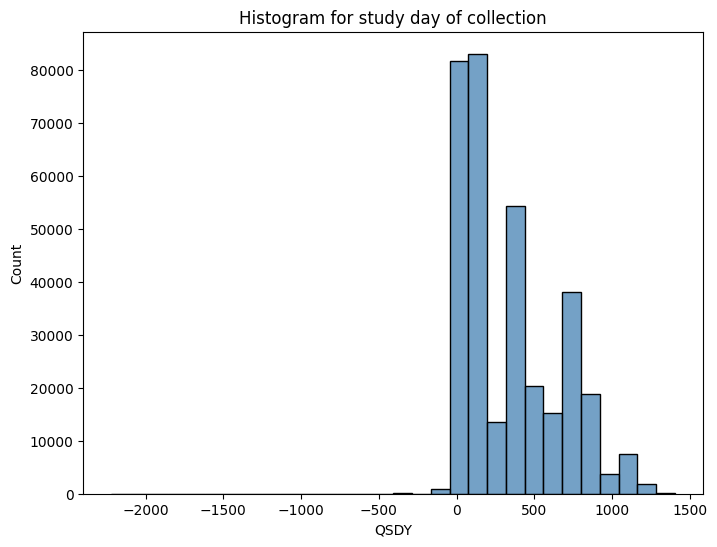

In [749]:
QSDY = qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

In [750]:
QSDY.describe()

count    339368.000000
mean        331.487830
std         315.596324
min       -2220.000000
25%          84.000000
50%         253.000000
75%         563.000000
max        1404.000000
Name: QSDY, dtype: float64

In [751]:
unique_QSDY_values_count = qs['QSDY'].nunique()
unique_QSDY_values_count

1091

1091 unique values of study day of collection

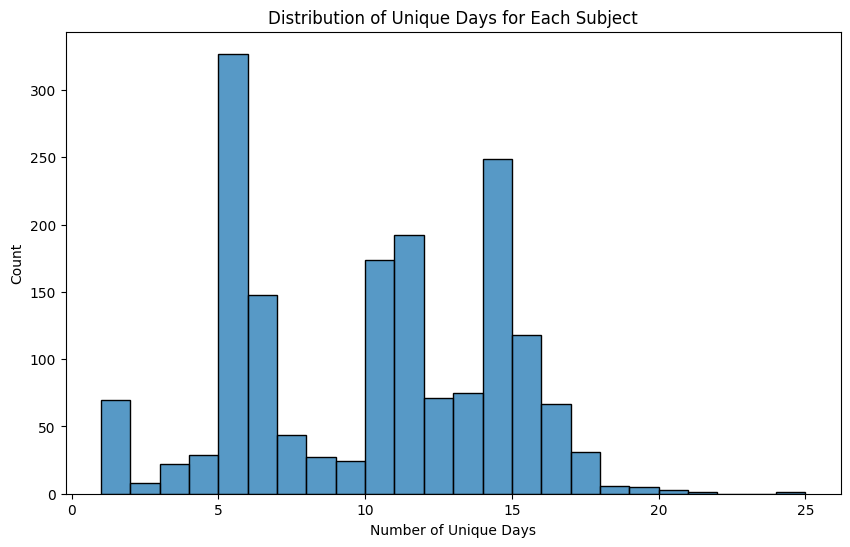

In [752]:
subject_days_count = qs.groupby('USUBJID')['QSDY'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(subject_days_count, bins=range(1, subject_days_count.max() + 2), kde=False)
plt.title('Distribution of Unique Days for Each Subject')
plt.xlabel('Number of Unique Days')
plt.ylabel('Count')
plt.show()

Distribution of the length of follow-up

Number of unique values in the 'Difference' column: 503


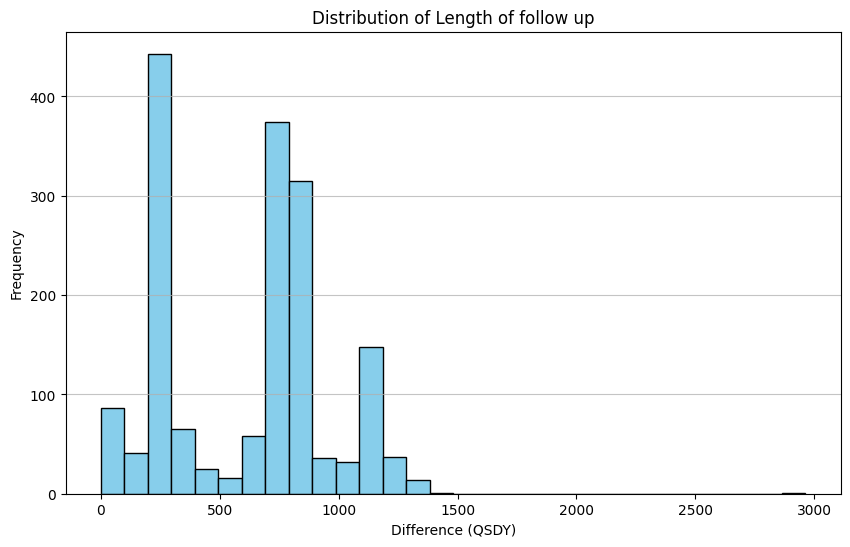

In [753]:
# Calculate the maximum and minimum values of QSDY for each unique patient ID
qs_max_min = qs.groupby('USUBJID')['QSDY'].agg(['max', 'min']).reset_index()

# Calculate the difference between the maximum and minimum values
qs_max_min['Difference'] = qs_max_min['max'] - qs_max_min['min']

# Display the number of unique values in the "Difference" column
num_unique_values = qs_max_min['Difference'].nunique()
print(f"Number of unique values in the 'Difference' column: {num_unique_values}")

# Plot the histogram of the distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(qs_max_min['Difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Length of follow up')
plt.xlabel('Difference (QSDY)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

- Descriptive statistics for categorical variables

In [754]:
categorical_columns = ['QSTEST', 'QSCAT', 'QSSCAT', 'QSORRES', 'QSSTRESC', 'VISIT', 'QSEVLINT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': qs[col].count(),
        'Missing Cases': qs[col].isna().sum(),
        'Unique Values': qs[col].nunique(),
        'Mode': qs[col].mode().values[0],
        'Mode Frequency': qs[col].value_counts().max()
    }

cat_qs = pd.DataFrame(descriptive_categorical).T
cat_qs

,Count,Missing Cases,Unique Values,Mode,Mode Frequency
QSTEST,448912,0,82,EDSS01-Expanded Disability Score,26285
QSCAT,448912,0,5,KFSS,188254
QSSCAT,182616,266296,14,PHYSICAL FUNCTIONING,48763
QSORRES,446774,2138,336,0,99587
QSSTRESC,447312,1600,166,0,110990
VISIT,448912,0,110,BASELINE,39162
QSEVLINT,154327,294585,2,-P4W,104924


- Number of observations for each QSTEST (Question Name) category

In [755]:
QSTEST_counts = qs['QSTEST'].value_counts().reset_index()
QSTEST_counts.columns = ['QSTEST', 'Count']
QSTEST_counts

,QSTEST,Count
0,EDSS01-Expanded Disability Score,26285
1,KFSS1-Sensory Functions,26219
2,KFSS1-Brain Stem Functions,26218
3,KFSS1-Bowel and Bladder Functions,26217
4,KFSS1-Cerebral or Mental Functions,26216
...,...,...
77,SF121-Amt Time Interfere Social Activity,1491
78,SF121-Phys Health: Limit Kind of Work,1490
79,KFSS1-Other Functions Specify,575
80,KFSS1-Weakness Interferes With Testing,423


- Number of observations for each QSCAT (Category of Question) category

In [756]:
QSCAT_counts = qs['QSCAT'].value_counts().reset_index()
QSCAT_counts.columns = ['QSCAT', 'Count']
QSCAT_counts

,QSCAT,Count
0,KFSS,188254
1,RAND-36 V1.0,164716
2,BDI-II,51756
3,EDSS,26285
4,SF-12 V2,17901


- Number of observations for each QSSCAT (subcategory for question) category

In [757]:
QSSCAT_counts = qs['QSSCAT'].value_counts().reset_index()
QSSCAT_counts.columns = ['QSSCAT', 'Count']
QSSCAT_counts

,QSSCAT,Count
0,PHYSICAL FUNCTIONING,48763
1,GENERAL HEALTH,24348
2,EMOTIONAL WELL-BEING,22887
3,ROLE LIMITATIONS DUE TO PHYSICAL HEALTH,18305
4,ENERGY/FATIGUE,18304
5,ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS,13718
6,SOCIAL FUNCTIONING,10630
7,PAIN,9149
8,HEALTH CHANGE,4581
9,ROLE EMOTIONAL,2984


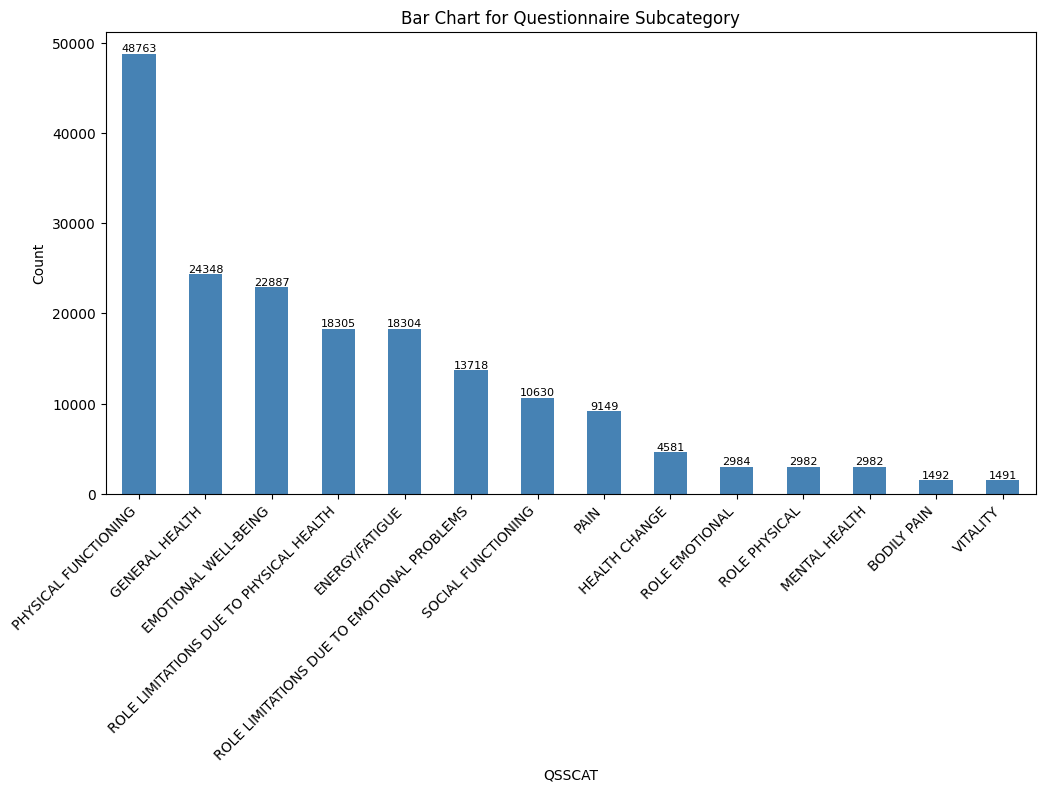

In [758]:
plt.figure(figsize=(12, 6))
ax = qs['QSSCAT'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('QSSCAT')
plt.ylabel('Count')
plt.title('Bar Chart for Questionnaire Subcategory')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

- Number of observations for each QSSTRESC (Character Result/Finding in Std Format) category

- Number of observations for each VISIT (Visit Name) category 

In [759]:
VISIT_counts = qs['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,BASELINE,39162
1,WEEK 24,32337
2,WEEK 12,22797
3,DAY 1,20853
4,MONTH 12,14275
...,...,...
105,VISIT8A MTH 6,32
106,END OF TREATMENT,22
107,MONTH 48,16
108,RELAPSE VISIT 5,16


- Number of observations for each QSEVLINT (Evaluation Interval) category 

In [760]:
QSEVLINT_counts = qs['QSEVLINT'].value_counts().reset_index()
QSEVLINT_counts.columns = ['QSEVLINT', 'Count']
QSEVLINT_counts

,QSEVLINT,Count
0,-P4W,104924
1,-P2W,49403


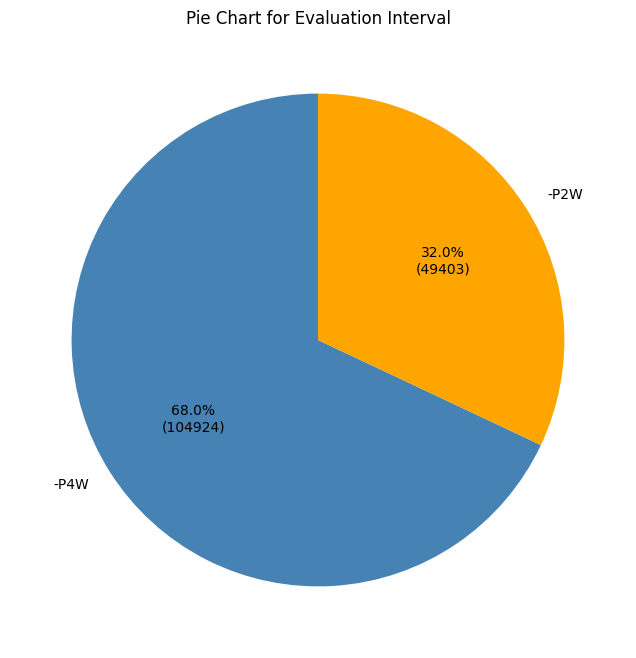

In [761]:
QSEVLINT_counts = qs['QSEVLINT'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(QSEVLINT_counts, labels=QSEVLINT_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(QSEVLINT_counts) / 100), startangle=90, colors=['steelblue', 'orange', 'green', 'red', 'purple'])
plt.title('Pie Chart for Evaluation Interval')
plt.show()

alleen BDI total score is numeriek, fix mistakes (bv EDSS van 3.6, inspect all graphs)

### Create a static dataframe

In [762]:
QSDY.describe()

count    339368.000000
mean        331.487830
std         315.596324
min       -2220.000000
25%          84.000000
50%         253.000000
75%         563.000000
max        1404.000000
Name: QSDY, dtype: float64

In [763]:
missing_percentages = qs.groupby('QSCAT')['QSDY'].apply(lambda x: (x.isnull().sum() / len(x)) * 100)
print("Missing percentage of study day for each outcome category:")
print(missing_percentages.round(2))

Missing percentage of study day for each outcome category:
QSCAT
BDI-II           0.00
EDSS            41.14
KFSS            51.98
RAND-36 V1.0     0.53
SF-12 V2         0.00
Name: QSDY, dtype: float64


#### BDI-II

In [764]:
BDI_rows = qs[qs['QSCAT'] == 'BDI-II']
BDI_rows['QSDY'].describe()

count    51756.000000
mean       145.552245
std        172.236740
min       -128.000000
25%          1.000000
50%         86.000000
75%        170.000000
max        736.000000
Name: QSDY, dtype: float64

In [765]:
# Check the number of unique OEDY values
unique_qsdy_values = BDI_rows['QSDY'].nunique()
print("Number of unique QSDY values when QSCAT is 'BDI-II':", unique_qsdy_values)

Number of unique QSDY values when QSCAT is 'BDI-II': 199


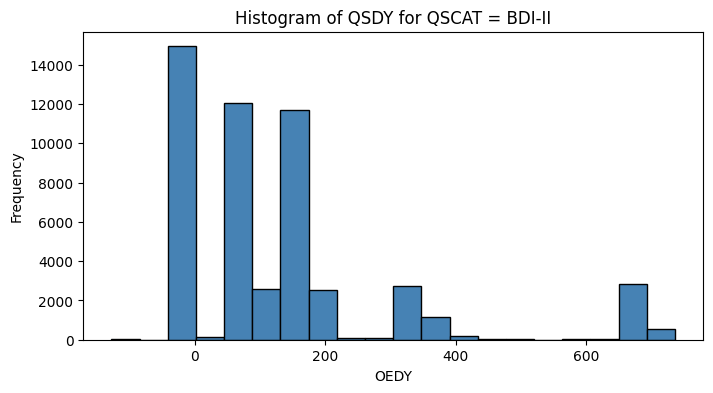

In [766]:
plt.figure(figsize=(8, 4))
plt.hist(BDI_rows['QSDY'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel('OEDY')
plt.ylabel('Frequency')
plt.title('Histogram of QSDY for QSCAT = BDI-II')
plt.show()

**!! QSORRES contains the explanation of the QSTEST so keep for now maybe but don't end up using it also tell Sofia she should be using QSSTRESC/QSSTRESN instead**

In [767]:
BDI_rows.head(44)

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
90,MSOAC/0024,9,BDI01-Sadness,BDI-II,NaN,I do not feel sad.,0,0.0,0.0,BASELINE,1.0,-P2W
91,MSOAC/0024,10,BDI01-Pessimism,BDI-II,NaN,I am not discouraged about my future.,0,0.0,0.0,BASELINE,1.0,-P2W
92,MSOAC/0024,11,BDI01-Past Failure,BDI-II,NaN,I do not feel like a failure.,0,0.0,0.0,BASELINE,1.0,-P2W
93,MSOAC/0024,12,BDI01-Loss of Pleasure,BDI-II,NaN,I get as much pleasure as I ever did from the ...,0,0.0,0.0,BASELINE,1.0,-P2W
94,MSOAC/0024,13,BDI01-Guilty Feelings,BDI-II,NaN,I don't feel particularly guilty.,0,0.0,0.0,BASELINE,1.0,-P2W
95,MSOAC/0024,14,BDI01-Punishment Feelings,BDI-II,NaN,I don't feel I am being punished.,0,0.0,0.0,BASELINE,1.0,-P2W
96,MSOAC/0024,15,BDI01-Self-Dislike,BDI-II,NaN,I feel the same about myself as ever.,0,0.0,0.0,BASELINE,1.0,-P2W
97,MSOAC/0024,16,BDI01-Self-Criticalness,BDI-II,NaN,I don't criticize or blame myself more than us...,0,0.0,0.0,BASELINE,1.0,-P2W
98,MSOAC/0024,17,BDI01-Suicidal Thoughts or Wishes,BDI-II,NaN,I don't have any thoughts of killing myself.,0,0.0,0.0,BASELINE,1.0,-P2W
99,MSOAC/0024,18,BDI01-Crying,BDI-II,NaN,I don't cry anymore than I used to.,0,0.0,0.0,BASELINE,1.0,-P2W


there seem to usually be 22 rows for each patient at a certain date (because the test consists of 21 items & we also have a row for the total score)

each item is rated from 0 to 3 so max score would be 3*21=63

In [768]:
result_table = BDI_rows.groupby(['USUBJID', 'QSDY']).size().reset_index(name='Count')
result_table

,USUBJID,QSDY,Count
0,MSOAC/0024,1.0,22
1,MSOAC/0024,95.0,22
2,MSOAC/0024,179.0,22
3,MSOAC/0024,340.0,22
4,MSOAC/0024,667.0,22
...,...,...,...
2354,MSOAC/9985,338.0,22
2355,MSOAC/9985,668.0,22
2356,MSOAC/9986,1.0,22
2357,MSOAC/9986,85.0,22


In [769]:
# check where it's not 22
filtered_result_table = result_table[result_table['Count'] != 22]
filtered_result_table

,USUBJID,QSDY,Count
11,MSOAC/0057,1.0,20
28,MSOAC/0111,1.0,21
30,MSOAC/0111,116.0,1
32,MSOAC/0111,345.0,21
44,MSOAC/0149,1.0,11
...,...,...,...
2254,MSOAC/9641,1.0,24
2292,MSOAC/9718,680.0,11
2293,MSOAC/9727,1.0,10
2307,MSOAC/9764,1.0,26


The problem is that not for all patients at all times u have all 22 answers, so we should take that into account (map it to a similar scale)

In [770]:
merged_df = pd.merge(filtered_result_table[['USUBJID', 'QSDY']], BDI_rows, on=['USUBJID', 'QSDY'], how='inner')
merged_df.head(45)


,USUBJID,QSDY,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSEVLINT
0,MSOAC/0057,1.0,9,BDI01-Sadness,BDI-II,NaN,I do not feel sad.,0,0.0,0.0,BASELINE,-P2W
1,MSOAC/0057,1.0,10,BDI01-Pessimism,BDI-II,NaN,I am not discouraged about my future.,0,0.0,0.0,BASELINE,-P2W
2,MSOAC/0057,1.0,11,BDI01-Past Failure,BDI-II,NaN,I do not feel like a failure.,0,0.0,0.0,BASELINE,-P2W
3,MSOAC/0057,1.0,12,BDI01-Loss of Pleasure,BDI-II,NaN,I don't enjoy things as much as I used to.,1,1.0,0.0,BASELINE,-P2W
4,MSOAC/0057,1.0,13,BDI01-Punishment Feelings,BDI-II,NaN,I don't feel I am being punished.,0,0.0,0.0,BASELINE,-P2W
5,MSOAC/0057,1.0,14,BDI01-Self-Dislike,BDI-II,NaN,I have lost confidence in myself.,1,1.0,0.0,BASELINE,-P2W
6,MSOAC/0057,1.0,15,BDI01-Self-Criticalness,BDI-II,NaN,I am more critical of myself than I used to be.,1,1.0,0.0,BASELINE,-P2W
7,MSOAC/0057,1.0,16,BDI01-Crying,BDI-II,NaN,I don't cry anymore than I used to.,0,0.0,0.0,BASELINE,-P2W
8,MSOAC/0057,1.0,17,BDI01-Agitation,BDI-II,NaN,I am no more restless or wound up than usual.,0,0.0,0.0,BASELINE,-P2W
9,MSOAC/0057,1.0,18,BDI01-Loss of Interest,BDI-II,NaN,I am less interested in other people or things...,1,1.0,0.0,BASELINE,-P2W


In [771]:
# check where it's larger than 22
filtered_result_table = result_table[result_table['Count'] > 22]
filtered_result_table

,USUBJID,QSDY,Count
85,MSOAC/0322,99.0,23
144,MSOAC/0539,1.0,44
224,MSOAC/0904,1.0,23
233,MSOAC/1026,92.0,24
340,MSOAC/1454,1.0,23
382,MSOAC/1627,163.0,24
442,MSOAC/1918,1.0,40
739,MSOAC/3268,686.0,23
886,MSOAC/3930,1.0,23
922,MSOAC/4003,1.0,24


In [772]:
merged_df = pd.merge(filtered_result_table[['USUBJID', 'QSDY']], BDI_rows, on=['USUBJID', 'QSDY'], how='inner')
merged_df.head(45)

,USUBJID,QSDY,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSEVLINT
0,MSOAC/0322,99.0,75,BDI01-Sadness,BDI-II,NaN,I do not feel sad.,0,0.0,3.0,MONTH3,-P2W
1,MSOAC/0322,99.0,76,BDI01-Pessimism,BDI-II,NaN,I am not discouraged about my future.,0,0.0,3.0,MONTH3,-P2W
2,MSOAC/0322,99.0,77,BDI01-Past Failure,BDI-II,NaN,I do not feel like a failure.,0,0.0,3.0,MONTH3,-P2W
3,MSOAC/0322,99.0,78,BDI01-Loss of Pleasure,BDI-II,NaN,I don't enjoy things as much as I used to.,1,1.0,3.0,MONTH3,-P2W
4,MSOAC/0322,99.0,79,BDI01-Guilty Feelings,BDI-II,NaN,I don't feel particularly guilty.,0,0.0,3.0,MONTH3,-P2W
5,MSOAC/0322,99.0,80,BDI01-Guilty Feelings,BDI-II,NaN,I feel guilty over many things I have done or ...,1,1.0,3.0,MONTH3,-P2W
6,MSOAC/0322,99.0,81,BDI01-Punishment Feelings,BDI-II,NaN,I don't feel I am being punished.,0,0.0,3.0,MONTH3,-P2W
7,MSOAC/0322,99.0,82,BDI01-Self-Dislike,BDI-II,NaN,I feel the same about myself as ever.,0,0.0,3.0,MONTH3,-P2W
8,MSOAC/0322,99.0,83,BDI01-Self-Criticalness,BDI-II,NaN,I don't criticize or blame myself more than us...,0,0.0,3.0,MONTH3,-P2W
9,MSOAC/0322,99.0,84,BDI01-Suicidal Thoughts or Wishes,BDI-II,NaN,I don't have any thoughts of killing myself.,0,0.0,3.0,MONTH3,-P2W


the ones with 44 seem to be duplicate rows so remove them

In [773]:
BDI_rows = BDI_rows.copy()
BDI_rows.drop_duplicates(subset=['USUBJID', 'QSDY', 'QSTEST', 'QSSTRESN'], inplace=True)

In [774]:
result_table = BDI_rows.groupby(['USUBJID', 'QSDY']).size().reset_index(name='Count')
filtered_result_table = result_table[result_table['Count'] > 22]
filtered_result_table

,USUBJID,QSDY,Count
85,MSOAC/0322,99.0,23
224,MSOAC/0904,1.0,23
233,MSOAC/1026,92.0,24
340,MSOAC/1454,1.0,23
382,MSOAC/1627,163.0,24
739,MSOAC/3268,686.0,23
886,MSOAC/3930,1.0,23
922,MSOAC/4003,1.0,24
931,MSOAC/4024,1.0,25
1003,MSOAC/4282,97.0,23


In [775]:
merged_df = pd.merge(filtered_result_table[['USUBJID', 'QSDY']], BDI_rows, on=['USUBJID', 'QSDY'], how='inner')
merged_df.head(50)

,USUBJID,QSDY,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSEVLINT
0,MSOAC/0322,99.0,75,BDI01-Sadness,BDI-II,NaN,I do not feel sad.,0,0.0,3.0,MONTH3,-P2W
1,MSOAC/0322,99.0,76,BDI01-Pessimism,BDI-II,NaN,I am not discouraged about my future.,0,0.0,3.0,MONTH3,-P2W
2,MSOAC/0322,99.0,77,BDI01-Past Failure,BDI-II,NaN,I do not feel like a failure.,0,0.0,3.0,MONTH3,-P2W
3,MSOAC/0322,99.0,78,BDI01-Loss of Pleasure,BDI-II,NaN,I don't enjoy things as much as I used to.,1,1.0,3.0,MONTH3,-P2W
4,MSOAC/0322,99.0,79,BDI01-Guilty Feelings,BDI-II,NaN,I don't feel particularly guilty.,0,0.0,3.0,MONTH3,-P2W
5,MSOAC/0322,99.0,80,BDI01-Guilty Feelings,BDI-II,NaN,I feel guilty over many things I have done or ...,1,1.0,3.0,MONTH3,-P2W
6,MSOAC/0322,99.0,81,BDI01-Punishment Feelings,BDI-II,NaN,I don't feel I am being punished.,0,0.0,3.0,MONTH3,-P2W
7,MSOAC/0322,99.0,82,BDI01-Self-Dislike,BDI-II,NaN,I feel the same about myself as ever.,0,0.0,3.0,MONTH3,-P2W
8,MSOAC/0322,99.0,83,BDI01-Self-Criticalness,BDI-II,NaN,I don't criticize or blame myself more than us...,0,0.0,3.0,MONTH3,-P2W
9,MSOAC/0322,99.0,84,BDI01-Suicidal Thoughts or Wishes,BDI-II,NaN,I don't have any thoughts of killing myself.,0,0.0,3.0,MONTH3,-P2W


In the dataframe BDI_rows, sometimes a test (QSTEST) outcome (QSSTRESN) is recorded more than once on the same day (QSDY) for the same patient (USUBJID). These are the cases with more than 22 items. We will keep only 1 of those rows, namely the one with the HIGHEST QSSTRESN of the rows.

In [776]:
# Convert QSSTRESN column to numeric in case it's not already
BDI_rows['QSSTRESN'] = pd.to_numeric(BDI_rows['QSSTRESN'], errors='coerce')

# Find the index of the maximum QSSTRESN within each group
max_idx = BDI_rows.groupby(['USUBJID', 'QSDY', 'QSTEST'])['QSSTRESN'].idxmax()

# Filter the DataFrame using the identified indices
BDI_rows = BDI_rows.loc[max_idx]

In [777]:
result_table = BDI_rows.groupby(['USUBJID', 'QSDY']).size().reset_index(name='Count')
result_table

,USUBJID,QSDY,Count
0,MSOAC/0024,1.0,22
1,MSOAC/0024,95.0,22
2,MSOAC/0024,179.0,22
3,MSOAC/0024,340.0,22
4,MSOAC/0024,667.0,22
...,...,...,...
2354,MSOAC/9985,338.0,22
2355,MSOAC/9985,668.0,22
2356,MSOAC/9986,1.0,22
2357,MSOAC/9986,85.0,22


In [778]:
filtered_result_table = result_table[result_table['Count'] != 22]
filtered_result_table

,USUBJID,QSDY,Count
11,MSOAC/0057,1.0,20
28,MSOAC/0111,1.0,21
30,MSOAC/0111,116.0,1
32,MSOAC/0111,345.0,21
44,MSOAC/0149,1.0,11
...,...,...,...
2202,MSOAC/9389,169.0,20
2206,MSOAC/9404,347.0,21
2215,MSOAC/9417,343.0,11
2292,MSOAC/9718,680.0,11


Divide every total score by 63 (for 21 itmes) or by 3 * the number of recorded BDI items (= count in result_table, but substract one because if the total score is present it's one of the items)

In [779]:
# Step 1: Filter BDI_rows based on QSTEST
filtered_rows = BDI_rows[BDI_rows['QSTEST'] == 'BDI01-BDI Total Score'].copy()

# Step 2: Merge with result_table to get the 'Count' for each unique combination of 'USUBJID' and 'QSDY'
merged_df = pd.merge(filtered_rows, result_table[['USUBJID', 'QSDY', 'Count']], on=['USUBJID', 'QSDY'], how='left')

# Step 3: Calculate the new value for QSSTRESN
merged_df['QSSTRESN'] = merged_df['QSSTRESN'] / (3 * (merged_df['Count'] - 1))

# Step 4: Drop the 'Count' column 
merged_df.drop(columns=['Count'], inplace=True)

# Step 5: Merge the modified rows back into the original DataFrame
BDI_rows = pd.merge(BDI_rows, merged_df[['USUBJID', 'QSDY', 'QSSTRESN']], on=['USUBJID', 'QSDY'], how='left')

only look at the rows with the Total BDI score

In [780]:
columns_to_drop = ['QSSEQ', 'QSSCAT', 'QSORRES', 'QSSTRESC', 'VISITNUM', 'QSEVLINT', 'QSSTRESN_x']
BDI_rows = BDI_rows[BDI_rows['QSTEST'] == 'BDI01-BDI Total Score'].drop(columns=columns_to_drop)
BDI_rows.rename(columns={'QSSTRESN_y': 'QSSTRESN'}, inplace=True)
BDI_rows = BDI_rows.sort_values(by='USUBJID')
BDI_rows

,USUBJID,QSTEST,QSCAT,VISIT,QSDY,QSSTRESN
1,MSOAC/0024,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.031746
23,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH3,95.0,0.031746
45,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH6,179.0,0.015873
67,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH12,340.0,0.047619
89,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH24,667.0,0.015873
...,...,...,...,...,...,...
51454,MSOAC/9985,BDI01-BDI Total Score,BDI-II,MONTH3,85.0,0.222222
51520,MSOAC/9985,BDI01-BDI Total Score,BDI-II,MONTH24,668.0,0.063492
51564,MSOAC/9986,BDI01-BDI Total Score,BDI-II,WEEK 12,85.0,0.063492
51542,MSOAC/9986,BDI01-BDI Total Score,BDI-II,DAY 1,1.0,0.047619


In [781]:
BDI_rows['QSSTRESN'].describe()

count    2350.000000
mean        0.163833
std         0.146750
min         0.000000
25%         0.047619
50%         0.126984
75%         0.238095
max         0.825397
Name: QSSTRESN, dtype: float64

In [782]:
BDI_rows['QSDY'].describe()

count    2350.000000
mean      146.245532
std       172.845060
min      -128.000000
25%         1.000000
50%        86.000000
75%       170.000000
max       736.000000
Name: QSDY, dtype: float64

Rename DAY 1 to BASELINE, WEEK 12 to MONTH3, WEEK 24 to MONTH6, WEEK 48 to MONTH12

In [783]:
# Replace values in the 'visit' column
BDI_rows['VISIT'] = BDI_rows['VISIT'].replace({
    'DAY 1': 'BASELINE',
    'WEEK 12': 'MONTH3',
    'WEEK 24': 'MONTH6',
    'WEEK 48': 'MONTH12'
})

unique_visit_values = BDI_rows['VISIT'].unique()
print(unique_visit_values)

['BASELINE' 'MONTH3' 'MONTH6' 'MONTH12' 'MONTH24' 'EARLY WITHDRAWAL'
 'MONTH15' 'MES VISIT 3' 'MONTH9' 'MONTH18' 'END OF TREATMENT']


In [784]:
end_of_treatment_rows = BDI_rows[BDI_rows['VISIT'] == 'END OF TREATMENT']

# Extract 'USUBJID' values from mes_visit_3_rows
usubjid_values = end_of_treatment_rows['USUBJID'].unique()

# Filter BDI_rows for the selected 'USUBJID' values
selected_patients_rows = BDI_rows[BDI_rows['USUBJID'].isin(usubjid_values)]
selected_patients_rows

,USUBJID,QSTEST,QSCAT,VISIT,QSDY,QSSTRESN
30627,MSOAC/6049,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.079365
30649,MSOAC/6049,BDI01-BDI Total Score,BDI-II,MONTH3,92.0,0.031746
30671,MSOAC/6049,BDI01-BDI Total Score,BDI-II,END OF TREATMENT,113.0,0.079365


Hier moet ik iets mee doen, die verwijderen of samen tellen bij maand x

In [785]:
early_withdrawal_rows = BDI_rows[BDI_rows['VISIT'] == 'EARLY WITHDRAWAL']

# Extract 'USUBJID' values from mes_visit_3_rows
usubjid_values = early_withdrawal_rows['USUBJID'].unique()

# Filter BDI_rows for the selected 'USUBJID' values
selected_patients_rows = BDI_rows[BDI_rows['USUBJID'].isin(usubjid_values)]
selected_patients_rows

,USUBJID,QSTEST,QSCAT,VISIT,QSDY,QSSTRESN
395,MSOAC/0063,BDI01-BDI Total Score,BDI-II,EARLY WITHDRAWAL,59.0,0.238095
373,MSOAC/0063,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.190476
2451,MSOAC/0432,BDI01-BDI Total Score,BDI-II,EARLY WITHDRAWAL,281.0,0.047619
2429,MSOAC/0432,BDI01-BDI Total Score,BDI-II,MONTH6,169.0,0.047619
2407,MSOAC/0432,BDI01-BDI Total Score,BDI-II,MONTH3,85.0,0.095238
2385,MSOAC/0432,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.063492
3650,MSOAC/0650,BDI01-BDI Total Score,BDI-II,MES VISIT 3,414.0,0.269841
3628,MSOAC/0650,BDI01-BDI Total Score,BDI-II,EARLY WITHDRAWAL,253.0,0.365079
3584,MSOAC/0650,BDI01-BDI Total Score,BDI-II,MONTH3,85.0,0.396825
3562,MSOAC/0650,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.365079


Ook hier ofwel veranderen naar MONTHX ofwel mogelijks verwijderen als het al na een maandje is?

In [786]:
mes_visit_3_rows = BDI_rows[BDI_rows['VISIT'] == 'MES VISIT 3']

# Extract 'USUBJID' values from mes_visit_3_rows
usubjid_values = mes_visit_3_rows['USUBJID'].unique()

# Filter BDI_rows for the selected 'USUBJID' values
selected_patients_rows = BDI_rows[BDI_rows['USUBJID'].isin(usubjid_values)]
selected_patients_rows

,USUBJID,QSTEST,QSCAT,VISIT,QSDY,QSSTRESN
3650,MSOAC/0650,BDI01-BDI Total Score,BDI-II,MES VISIT 3,414.0,0.269841
3628,MSOAC/0650,BDI01-BDI Total Score,BDI-II,EARLY WITHDRAWAL,253.0,0.365079
3584,MSOAC/0650,BDI01-BDI Total Score,BDI-II,MONTH3,85.0,0.396825
3562,MSOAC/0650,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.365079
3606,MSOAC/0650,BDI01-BDI Total Score,BDI-II,MONTH6,169.0,0.301587
13685,MSOAC/2792,BDI01-BDI Total Score,BDI-II,MES VISIT 3,409.0,0.253968
13663,MSOAC/2792,BDI01-BDI Total Score,BDI-II,MONTH6,169.0,0.238095
13641,MSOAC/2792,BDI01-BDI Total Score,BDI-II,MONTH3,85.0,0.079365
13619,MSOAC/2792,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.174603
39049,MSOAC/7728,BDI01-BDI Total Score,BDI-II,MES VISIT 3,309.0,0.222222


How many rows do you have for each patient is between 1 and 6.

In [787]:
min_max_measurements = BDI_rows.groupby('USUBJID').size().agg(['min', 'max'])
print(min_max_measurements)

min    1
max    6
dtype: int64


Rename DAY 1 to BASELINE, WEEK 12 to MONTH3, WEEK 24 to MONTH6, WEEK 48 to MONTH12

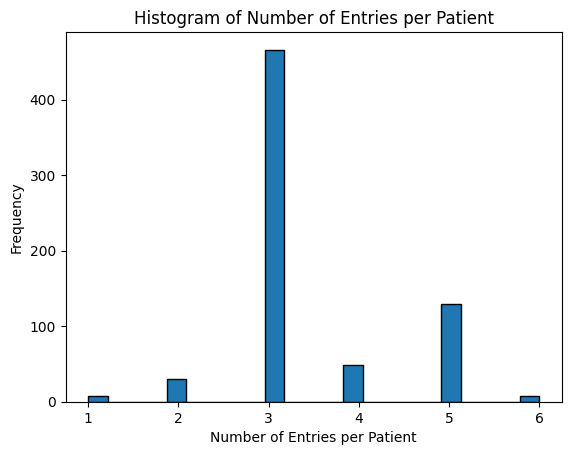

In [788]:
# Grouping by 'USUBJID' and counting the number of entries for each patient
patient_entries_count = BDI_rows.groupby('USUBJID').size()

# Creating a histogram
plt.hist(patient_entries_count, bins='auto', edgecolor='black')
plt.xlabel('Number of Entries per Patient')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Entries per Patient')
plt.show()

In [789]:
patient_entries_count = BDI_rows.groupby('USUBJID').size().reset_index(name='Number_of_Entries')

# Grouping by 'Number_of_Entries' and counting the number of patients for each count of entries
entries_distribution = patient_entries_count.groupby('Number_of_Entries').size().reset_index(name='Number_of_Patients')
entries_distribution

,Number_of_Entries,Number_of_Patients
0,1,7
1,2,30
2,3,466
3,4,48
4,5,129
5,6,8


In [790]:
patients_with_six_entries = BDI_rows.groupby('USUBJID').filter(lambda x: len(x) == 6)
patients_with_six_entries

,USUBJID,QSTEST,QSCAT,VISIT,QSDY,QSSTRESN
1285,MSOAC/0216,BDI01-BDI Total Score,BDI-II,MONTH24,670.0,0.174603
1263,MSOAC/0216,BDI01-BDI Total Score,BDI-II,MONTH15,430.0,0.158730
1241,MSOAC/0216,BDI01-BDI Total Score,BDI-II,MONTH12,347.0,0.095238
1175,MSOAC/0216,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.111111
1197,MSOAC/0216,BDI01-BDI Total Score,BDI-II,MONTH3,96.0,0.063492
1219,MSOAC/0216,BDI01-BDI Total Score,BDI-II,MONTH6,178.0,0.095238
13069,MSOAC/2714,BDI01-BDI Total Score,BDI-II,MONTH24,672.0,0.095238
13025,MSOAC/2714,BDI01-BDI Total Score,BDI-II,MONTH9,288.0,0.063492
13047,MSOAC/2714,BDI01-BDI Total Score,BDI-II,MONTH12,330.0,0.031746
12981,MSOAC/2714,BDI01-BDI Total Score,BDI-II,MONTH3,102.0,0.126984


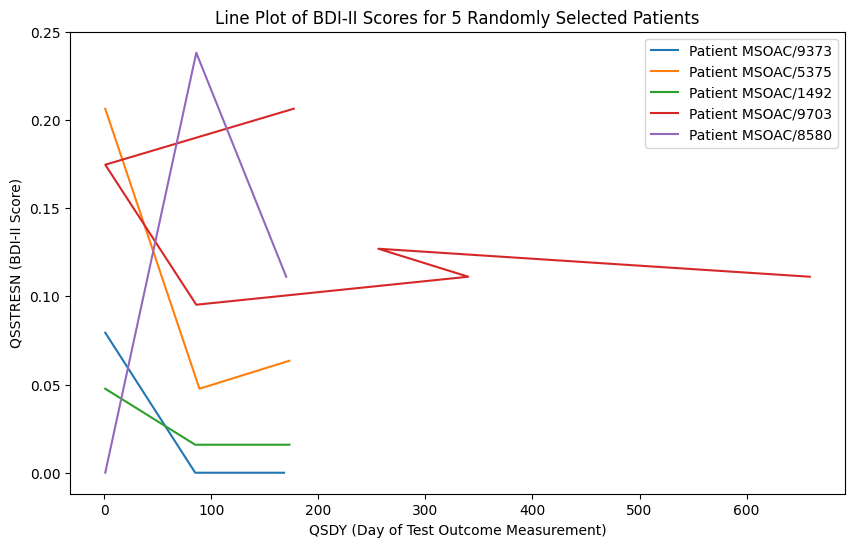

In [791]:
# Select a few random USUBJID values
random_usubjid_values = np.random.choice(BDI_rows['USUBJID'].unique(), size=5, replace=False)

# Filter BDI_rows for the selected USUBJID values
selected_patients_data = BDI_rows[BDI_rows['USUBJID'].isin(random_usubjid_values)]

# Create a line plot for each selected patient
plt.figure(figsize=(10, 6))
for usubjid in random_usubjid_values:
    patient_data = selected_patients_data[selected_patients_data['USUBJID'] == usubjid]
    plt.plot(patient_data['QSDY'], patient_data['QSSTRESN'], label=f'Patient {usubjid}')

# Set labels and title
plt.xlabel('QSDY (Day of Test Outcome Measurement)')
plt.ylabel('QSSTRESN (BDI-II Score)')
plt.title('Line Plot of BDI-II Scores for 5 Randomly Selected Patients')
plt.legend()
plt.show()

In [792]:
BDI_rows.head()

,USUBJID,QSTEST,QSCAT,VISIT,QSDY,QSSTRESN
1,MSOAC/0024,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.031746
23,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH3,95.0,0.031746
45,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH6,179.0,0.015873
67,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH12,340.0,0.047619
89,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH24,667.0,0.015873


In [793]:
max_qsdy_month12 = BDI_rows.loc[BDI_rows['VISIT'] == 'MONTH12', 'QSDY'].max()
print("Max QSDY for VISIT=MONTH12:", max_qsdy_month12)

Max QSDY for VISIT=MONTH12: 381.0


use this instead of 365 for time bin cut-off (? is that ok to do)

In [794]:
max_qsdy_baseline = BDI_rows.loc[BDI_rows['VISIT'] == 'BASELINE', 'QSDY'].max()
min_qsdy_baseline = BDI_rows.loc[BDI_rows['VISIT'] == 'BASELINE', 'QSDY'].min()
print("Max and min QSDY for VISIT=BASELINE:", max_qsdy_baseline, "and ", min_qsdy_baseline)

Max and min QSDY for VISIT=BASELINE: 90.0 and  -29.0


can't use that

In [795]:
unique_usubjid_count = BDI_rows['USUBJID'].nunique()
print("Number of unique USUBJID's in BDI_rows:", unique_usubjid_count)

Number of unique USUBJID's in BDI_rows: 688


In [796]:
# Create subsets for different time periods
before_study_start = BDI_rows[BDI_rows['QSDY'] <= 1]
one_year_after_start = BDI_rows[(BDI_rows['QSDY'] > 1) & (BDI_rows['QSDY'] <= max_qsdy_month12)]
two_years_after_start = BDI_rows[BDI_rows['QSDY'] > max_qsdy_month12]

# Function to count observations for a given subset
def count_observations(subset, title):
    outcome_measure_counts = subset.groupby(['QSTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('QSTEST')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')


Before Study Start


,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
BDI01-BDI Total Score,676.0,1.001479,0.038462,1.0,1.0,1.0,1.0,2.0


In [797]:
count_observations(one_year_after_start, '1st year after Study Start')


1st year after Study Start


,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
BDI01-BDI Total Score,681.0,2.207048,0.517071,1.0,2.0,2.0,2.0,4.0


In [798]:
count_observations(two_years_after_start, '2nd year after Study Start')


2nd year after Study Start


,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
BDI01-BDI Total Score,164.0,1.036585,0.188317,1.0,1.0,1.0,1.0,2.0


Is 167 patients enough?

In [799]:
conditions = [
    (BDI_rows['QSDY'] <= 1),
    ((BDI_rows['QSDY'] > 1) & (BDI_rows['QSDY'] <= 365)), #max_qsdy_month12
    (BDI_rows['QSDY'] > 365) #max_qsdy_month12
]

# Define corresponding values for each condition
values = ['BDI_before', 'BDI_1y', 'BDI_after_1y']

# Create the new column "FT_PERIOD"
BDI_rows['QS_PERIOD'] = np.select(conditions, values, default='NaN')
BDI_rows = BDI_rows.dropna(subset=['QSDY']) #Drop observations for which we don't have time of test 
BDI_rows.head()

,USUBJID,QSTEST,QSCAT,VISIT,QSDY,QSSTRESN,QS_PERIOD
1,MSOAC/0024,BDI01-BDI Total Score,BDI-II,BASELINE,1.0,0.031746,BDI_before
23,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH3,95.0,0.031746,BDI_1y
45,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH6,179.0,0.015873,BDI_1y
67,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH12,340.0,0.047619,BDI_1y
89,MSOAC/0024,BDI01-BDI Total Score,BDI-II,MONTH24,667.0,0.015873,BDI_after_1y


In [800]:
# Calculate the median of QSSTRESN for each 'QS_PERIOD' for each patient
median_df = BDI_rows.groupby(['USUBJID', 'QS_PERIOD']).agg({
    'QSSTRESN': 'median'
}).reset_index()

# Pivot the table
pivot_df = median_df.pivot_table(index='USUBJID', columns=['QS_PERIOD'], values='QSSTRESN').reset_index()

# Remove the name of the index and columns
pivot_df.index.name = None
pivot_df.columns.name = None

# Reorganize columns
desired_order = ['USUBJID', 'BDI_before', 'BDI_1y', 'BDI_after_1y']
result_BDI = pivot_df[desired_order]

# Display the resulting DataFrame
result_BDI

,USUBJID,BDI_before,BDI_1y,BDI_after_1y
0,MSOAC/0024,0.031746,0.031746,0.015873
1,MSOAC/0030,0.063492,0.039683,NaN
2,MSOAC/0046,0.317460,0.206349,NaN
3,MSOAC/0057,0.175439,0.142857,NaN
4,MSOAC/0060,0.349206,0.325397,NaN
...,...,...,...,...
683,MSOAC/9952,0.269841,0.301587,NaN
684,MSOAC/9963,0.190476,0.095238,NaN
685,MSOAC/9980,0.238095,0.285714,NaN
686,MSOAC/9985,0.142857,0.063492,0.063492


In [801]:
# Calculate the percentage of missing values for each column
missing_percentage = result_BDI.isnull().mean() * 100

# Sort the values from high to low
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)

BDI_after_1y    75.726744
BDI_before       1.744186
BDI_1y           1.017442
USUBJID          0.000000
dtype: float64


Ideas
- clean up the VISIT column so that I can use this as 8 separate time stamps: BASELINE - 3M - 6M - 9M - 12M - 15M - 18M - 24M
- either keep those 8 separate time stamps or divide into 3/4 time bins (e.g. BASELINE - 1ST YR - 2ND YR)
- turn into a static dataframe with 1 row per observation

#### EDSS

In [802]:
EDSS_rows = qs[qs['QSCAT'] == 'EDSS']
EDSS_rows['QSDY'].describe()

count    15471.000000
mean       325.069937
std        297.286138
min       -407.000000
25%         85.000000
50%        254.000000
75%        547.000000
max       1404.000000
Name: QSDY, dtype: float64

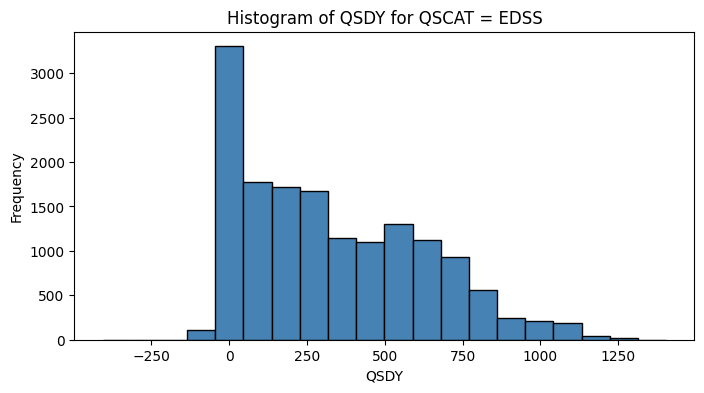

In [803]:
plt.figure(figsize=(8, 4))
plt.hist(EDSS_rows['QSDY'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel('QSDY')
plt.ylabel('Frequency')
plt.title('Histogram of QSDY for QSCAT = EDSS')
plt.show()

In [804]:
# Assuming EDSS_rows is your DataFrame
unique_usubjid_count = EDSS_rows['USUBJID'].nunique()

print(f"The number of unique USUBJID in the EDSS_rows DataFrame is: {unique_usubjid_count}")

The number of unique USUBJID in the EDSS_rows DataFrame is: 2465


##### **Lose ~32% of patients by excluding the ones that dont have their time values recorded but there's not really a way around this**

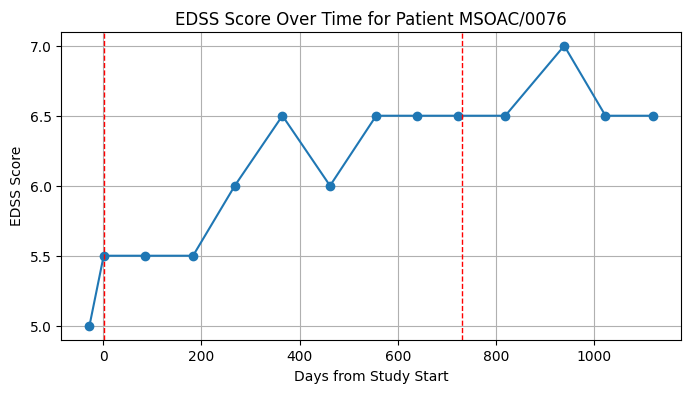

In [805]:
patient_id = 'MSOAC/0053'
patient_id = 'MSOAC/0076'
#patient_id = 'MSOAC/0141'

# Filter the DataFrame for the specific patient
patient_data = EDSS_rows[EDSS_rows['USUBJID'] == patient_id]

# Plot the EDSS score over time
plt.figure(figsize=(8, 4))
plt.plot(patient_data['QSDY'], patient_data['QSSTRESN'], marker='o')
plt.title(f'EDSS Score Over Time for Patient {patient_id}')
plt.xlabel('Days from Study Start')
plt.ylabel('EDSS Score')
plt.grid(True)

# Set y-axis ticks in increments of 0.5, starting from the minimal value
min_value = patient_data['QSSTRESN'].min()
max_value = patient_data['QSSTRESN'].max()
plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [1, 730]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)
plt.show()

In [806]:
# Create subsets for different time periods
before_study_start = qs[qs['QSDY'] <= 1]
two_years_after_start = qs[(qs['QSDY'] >= 1) & (qs['QSDY'] <= 730)]
four_years_after_start = qs[qs['QSDY'] > 730]

# Function to count observations for a given subset
def count_observations(subset, title):
    filtered_rows = subset[subset['QSCAT'] == 'EDSS']
    outcome_measure_counts = filtered_rows.groupby(['QSCAT', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('QSCAT')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')


Before Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,1692.0,1.951537,0.222913,1.0,2.0,2.0,2.0,3.0


In [807]:
count_observations(two_years_after_start, '2 Years After Study Start')


2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,1622.0,7.413687,2.72143,1.0,5.0,9.0,9.0,18.0


In [808]:
count_observations(four_years_after_start, 'More Than 2 Years After Study Start')


More Than 2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,647.0,2.629057,1.363485,1.0,2.0,2.0,4.0,8.0


It doesn't seem to be a good grouping here (discard this, avg number of observations per patient is not relevant for time bin grouping they said!) - but I want to look at maximum EDSS score and not calculate a median or mean so maybe I just track the maximum EDSS each year?

**NOTE: we remove all the patients that don't have the time value because they would be put in a separate bin and that's messy so they told us for now to just remove that BUT KEEP IN MIND THAT THIS REMOVES LIKE HALF OF THE EDSS DATA!**

In [809]:
# Filter the DataFrame to include only the specified FTTEST values
EDSS_df = EDSS_rows.copy()  # Create a copy to avoid the warning

conditions = [
    (EDSS_df['QSDY'] <= 1),
    #((EDSS_df['QSDY'] > 0) & (EDSS_df['QSDY'] <= 365)),
    ((EDSS_df['QSDY'] > 1) & (EDSS_df['QSDY'] <= 730)), #365
    ((EDSS_df['QSDY'] > 730))
    #((EDSS_df['QSDY'] > 730) & (EDSS_df['QSDY'] <= 1095)),
    #((EDSS_df['QSDY'] > 1095) & (EDSS_df['QSDY'] <= 1460))  # maximal value is 1404
]

# Define corresponding values for each condition
values = ['before', '2y', 'after_2y'] #'1y' removed

# Create the new column "FT_PERIOD"
EDSS_df['QS_PERIOD'] = np.select(conditions, values, default='NaN')
EDSS_df = EDSS_df.dropna(subset=['QSDY']) #Drop observations for which we don't have time of test
EDSS_df.head()

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT,QS_PERIOD
205218,MSOAC/0016,1,EDSS01-Expanded Disability Score,EDSS,NaN,6,6,6.0,1.0,SCREENING,-21.0,NaN,before
214058,MSOAC/0019,1,EDSS01-Expanded Disability Score,EDSS,NaN,4,4,4.0,-3.0,SCREENING -3,-27.0,NaN,before
45,MSOAC/0019,10,EDSS01-Expanded Disability Score,EDSS,NaN,3.5,3.5,3.5,0.0,BASELINE,1.0,NaN,before
168434,MSOAC/0019,55,EDSS01-Expanded Disability Score,EDSS,NaN,3.5,3.5,3.5,3.0,MONTH 3,93.0,NaN,2y
191059,MSOAC/0019,64,EDSS01-Expanded Disability Score,EDSS,NaN,3,3,3.0,6.0,MONTH 6,184.0,NaN,2y


In [810]:
grouped_df = EDSS_df.pivot_table(values='QSSTRESN', index='USUBJID', columns='QS_PERIOD', aggfunc='median', fill_value=None).reset_index()

# Rename the columns 
grouped_df.columns = ['USUBJID'] + [f"EDSS-{period}" for period in grouped_df.columns[1:]]

# Merge the new DataFrame with the original DataFrame on 'USUBJID'
result_EDSS = pd.merge(EDSS_df[['USUBJID']], grouped_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient and period
result_EDSS = result_EDSS.drop_duplicates(subset=['USUBJID'])
result_EDSS.head(20)

,USUBJID,EDSS-2y,EDSS-after_2y,EDSS-before
0,MSOAC/0016,NaN,NaN,6.00
1,MSOAC/0019,3.50,3.0,3.75
15,MSOAC/0024,3.75,NaN,4.00
25,MSOAC/0030,1.50,NaN,2.00
30,MSOAC/0031,1.00,1.0,1.00
44,MSOAC/0041,6.50,NaN,6.50
51,MSOAC/0046,2.50,NaN,2.50
57,MSOAC/0050,2.00,1.5,2.00
70,MSOAC/0053,8.00,8.0,6.50
79,MSOAC/0057,8.00,NaN,6.50


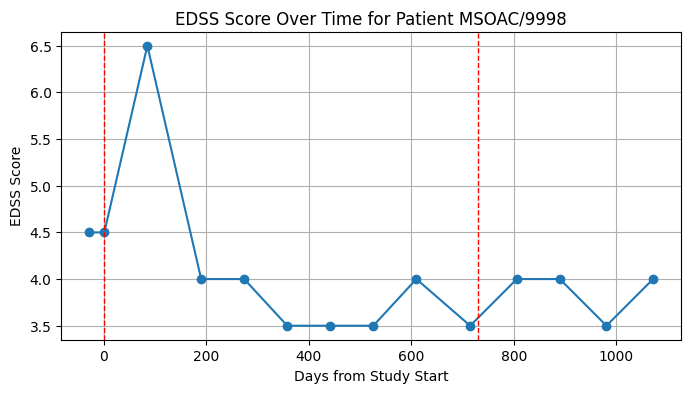

In [811]:
#patient_id = 'MSOAC/0053'
#patient_id = 'MSOAC/0076'
#patient_id = 'MSOAC/0168'
patient_id = 'MSOAC/9998'

# Filter the DataFrame for the specific patient
patient_data = EDSS_rows[EDSS_rows['USUBJID'] == patient_id]

# Plot the EDSS score over time
plt.figure(figsize=(8, 4))
plt.plot(patient_data['QSDY'], patient_data['QSSTRESN'], marker='o')
plt.title(f'EDSS Score Over Time for Patient {patient_id}')
plt.xlabel('Days from Study Start')
plt.ylabel('EDSS Score')
plt.grid(True)

# Set y-axis ticks in increments of 0.5, starting from the minimal value
min_value = patient_data['QSSTRESN'].min()
max_value = patient_data['QSSTRESN'].max()
plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [0, 730]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)
plt.show()

In [812]:
# Calculate the percentage of missing values for each column
missing_percentage = result_EDSS.isnull().mean() * 100

# Sort columns based on missing percentage in descending order
sorted_columns = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values for each column in result_EDSS (sorted high to low):")
print(sorted_columns)

Percentage of missing values for each column in result_EDSS (sorted high to low):
EDSS-after_2y    61.761229
EDSS-2y           4.609929
USUBJID           0.000000
EDSS-before       0.000000
dtype: float64


#### KFSS

In [813]:
KFSS_qs = qs[qs['QSCAT'] == 'KFSS']
KFSS_qs = KFSS_qs.drop(columns=['QSSEQ','VISITNUM','VISIT'])
KFSS_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,QSDY,QSEVLINT
216854,MSOAC/0014,KFSS1-Pyramidal Functions,KFSS,NaN,1,1,1.0,NaN,NaN
216855,MSOAC/0014,KFSS1-Cerebellar Functions,KFSS,NaN,0,0,0.0,NaN,NaN
216856,MSOAC/0014,KFSS1-Brain Stem Functions,KFSS,NaN,0,0,0.0,NaN,NaN
216857,MSOAC/0014,KFSS1-Sensory Functions,KFSS,NaN,0,0,0.0,NaN,NaN
216858,MSOAC/0014,KFSS1-Bowel and Bladder Functions,KFSS,NaN,0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
234423,MSOAC/9999,KFSS1-Brain Stem Functions,KFSS,NaN,2,2,2.0,NaN,NaN
234424,MSOAC/9999,KFSS1-Sensory Functions,KFSS,NaN,2,2,2.0,NaN,NaN
234425,MSOAC/9999,KFSS1-Bowel and Bladder Functions,KFSS,NaN,1,1,1.0,NaN,NaN
234426,MSOAC/9999,KFSS1-Visual or Optic Functions,KFSS,NaN,0,0,0.0,NaN,NaN


In [814]:
unique_usubjid_kfss_count = KFSS_qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_kfss_count)

Number of unique values in USUBJID: 2395


In [815]:
missing_percentage_kfss = (KFSS_qs.isnull().sum() / len(KFSS_qs)) * 100
missing_kfss = pd.DataFrame({'Column Name': missing_percentage_kfss.index, 'Missing Percentage': missing_percentage_kfss.values})
missing_kfss = missing_kfss.sort_values(by='Missing Percentage', ascending=False)
print(missing_kfss)

  Column Name  Missing Percentage
3      QSSCAT          100.000000
8    QSEVLINT          100.000000
7        QSDY           51.981897
6    QSSTRESN            0.636374
4     QSORRES            0.106239
5    QSSTRESC            0.106239
0     USUBJID            0.000000
1      QSTEST            0.000000
2       QSCAT            0.000000


In [816]:
# Filter rows where column A is NA and display values of column B
result_df = KFSS_qs[KFSS_qs['QSSTRESN'].isna()]#['QSORRES']

# Convert the result to a DataFrame
result_df = pd.DataFrame(result_df) #, columns=['QSORRES']

# Display the result DataFrame
result_df#.dropna()

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,QSDY,QSEVLINT
128036,MSOAC/0019,KFSS1-Pyramidal Functions,KFSS,NaN,NaN,NaN,NaN,542.0,NaN
128037,MSOAC/0019,KFSS1-Cerebellar Functions,KFSS,NaN,NaN,NaN,NaN,542.0,NaN
128044,MSOAC/0019,KFSS1-Other Functions Specify,KFSS,NaN,FATIGUE,FATIGUE,NaN,542.0,NaN
134015,MSOAC/0019,KFSS1-Other Functions Specify,KFSS,NaN,FATIGUE,FATIGUE,NaN,626.0,NaN
204513,MSOAC/0041,KFSS1-Weakness Interferes With Testing,KFSS,NaN,CHECKED,CHECKED,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
173807,MSOAC/9998,KFSS1-Weakness Interferes With Testing,KFSS,NaN,CHECKED,CHECKED,NaN,85.0,NaN
147870,MSOAC/9998,KFSS1-Other Functions,KFSS,NaN,NaN,NaN,NaN,85.0,NaN
196144,MSOAC/9998,KFSS1-Other Functions,KFSS,NaN,NaN,NaN,NaN,190.0,NaN
202765,MSOAC/9998,KFSS1-Other Functions,KFSS,NaN,NaN,NaN,NaN,274.0,NaN


In [817]:
KFSS_qs = KFSS_qs.dropna(subset=['QSSTRESN'])

In [818]:
# Group data by patient ID and count total entries and missing values in column A
missing_data = KFSS_qs.groupby('USUBJID', as_index=False)['QSDY'].agg(total_entries='count', missing_values=lambda x: x.isnull().sum())

# Calculate percentage of missing values for each patient ID
missing_data['percentage_missing'] = (missing_data['missing_values'] / missing_data['total_entries']) * 100

# Display the result
missing_data

,USUBJID,total_entries,missing_values,percentage_missing
0,MSOAC/0014,0,28,inf
1,MSOAC/0019,110,0,0.0
2,MSOAC/0024,70,0,0.0
3,MSOAC/0030,35,0,0.0
4,MSOAC/0031,98,0,0.0
...,...,...,...,...
2390,MSOAC/9986,35,0,0.0
2391,MSOAC/9987,0,110,inf
2392,MSOAC/9995,0,140,inf
2393,MSOAC/9998,108,0,0.0


In [819]:
usubjid_inf_percentage_missing = missing_data[missing_data['percentage_missing'] == np.inf]['USUBJID'].tolist()

# Display the list of USUBJID
print(usubjid_inf_percentage_missing)

num_patients_inf_percentage_missing = len(usubjid_inf_percentage_missing)
print("Number of patients with infinite percentage missing:", num_patients_inf_percentage_missing)

['MSOAC/0014', 'MSOAC/0034', 'MSOAC/0035', 'MSOAC/0041', 'MSOAC/0044', 'MSOAC/0051', 'MSOAC/0053', 'MSOAC/0061', 'MSOAC/0067', 'MSOAC/0092', 'MSOAC/0093', 'MSOAC/0094', 'MSOAC/0095', 'MSOAC/0102', 'MSOAC/0110', 'MSOAC/0117', 'MSOAC/0119', 'MSOAC/0141', 'MSOAC/0151', 'MSOAC/0158', 'MSOAC/0165', 'MSOAC/0166', 'MSOAC/0185', 'MSOAC/0186', 'MSOAC/0189', 'MSOAC/0194', 'MSOAC/0212', 'MSOAC/0232', 'MSOAC/0236', 'MSOAC/0241', 'MSOAC/0250', 'MSOAC/0252', 'MSOAC/0254', 'MSOAC/0275', 'MSOAC/0288', 'MSOAC/0295', 'MSOAC/0315', 'MSOAC/0319', 'MSOAC/0332', 'MSOAC/0348', 'MSOAC/0354', 'MSOAC/0358', 'MSOAC/0363', 'MSOAC/0364', 'MSOAC/0366', 'MSOAC/0368', 'MSOAC/0373', 'MSOAC/0378', 'MSOAC/0390', 'MSOAC/0391', 'MSOAC/0395', 'MSOAC/0406', 'MSOAC/0431', 'MSOAC/0440', 'MSOAC/0459', 'MSOAC/0473', 'MSOAC/0481', 'MSOAC/0484', 'MSOAC/0487', 'MSOAC/0495', 'MSOAC/0501', 'MSOAC/0513', 'MSOAC/0516', 'MSOAC/0521', 'MSOAC/0524', 'MSOAC/0550', 'MSOAC/0559', 'MSOAC/0578', 'MSOAC/0581', 'MSOAC/0587', 'MSOAC/0588', 'MSOA

In [820]:
KFSS_qs = KFSS_qs[~KFSS_qs['USUBJID'].isin(usubjid_inf_percentage_missing)]

# Display the modified DataFrame
KFSS_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,QSDY,QSEVLINT
214059,MSOAC/0019,KFSS1-Pyramidal Functions,KFSS,NaN,3,3,3.0,-27.0,NaN
214060,MSOAC/0019,KFSS1-Cerebellar Functions,KFSS,NaN,0,0,0.0,-27.0,NaN
214061,MSOAC/0019,KFSS1-Brain Stem Functions,KFSS,NaN,1,1,1.0,-27.0,NaN
214062,MSOAC/0019,KFSS1-Sensory Functions,KFSS,NaN,3,3,3.0,-27.0,NaN
214063,MSOAC/0019,KFSS1-Bowel and Bladder Functions,KFSS,NaN,1,1,1.0,-27.0,NaN
...,...,...,...,...,...,...,...,...,...
83486,MSOAC/9998,KFSS1-Sensory Functions,KFSS,NaN,1,1,1.0,1072.0,NaN
83487,MSOAC/9998,KFSS1-Bowel and Bladder Functions,KFSS,NaN,1,1,1.0,1072.0,NaN
83488,MSOAC/9998,KFSS1-Visual or Optic Functions,KFSS,NaN,1,1,1.0,1072.0,NaN
83489,MSOAC/9998,KFSS1-Cerebral or Mental Functions,KFSS,NaN,0,0,0.0,1072.0,NaN


In [821]:
KFSS_qs = KFSS_qs.drop(columns=['QSEVLINT'])

In [822]:
KFSS_qs['QSTEST'].value_counts()

QSTEST
KFSS1-Sensory Functions               12268
KFSS1-Brain Stem Functions            12266
KFSS1-Bowel and Bladder Functions     12266
KFSS1-Pyramidal Functions             12265
KFSS1-Cerebral or Mental Functions    12265
KFSS1-Visual or Optic Functions       12258
KFSS1-Cerebellar Functions            12165
KFSS1-Other Functions                  3802
Name: count, dtype: int64

In [823]:
num_tests = KFSS_qs.copy()

# Group by columns A and B, then count the occurrences of each unique pair
num_tests['COUNT'] = num_tests.groupby(['USUBJID', 'QSDY'])['USUBJID'].transform('count')

# Display the updated DataFrame
num_tests=num_tests[['USUBJID','QSDY', 'COUNT']].drop_duplicates()
num_tests

,USUBJID,QSDY,COUNT
214059,MSOAC/0019,-27.0,8
46,MSOAC/0019,1.0,8
168435,MSOAC/0019,93.0,8
191060,MSOAC/0019,184.0,8
197904,MSOAC/0019,263.0,8
...,...,...,...
159593,MSOAC/9998,715.0,8
162930,MSOAC/9998,806.0,8
176609,MSOAC/9998,890.0,8
179088,MSOAC/9998,981.0,7


In [824]:
num_tests[num_tests['COUNT'] != 8]

,USUBJID,QSDY,COUNT
128038,MSOAC/0019,542.0,6
202775,MSOAC/0024,-27.0,7
113,MSOAC/0024,1.0,7
162962,MSOAC/0024,95.0,7
185674,MSOAC/0024,179.0,7
...,...,...,...
427327,MSOAC/9986,252.0,7
173806,MSOAC/9998,85.0,7
196137,MSOAC/9998,190.0,7
202758,MSOAC/9998,274.0,7


In [825]:
num_tests[(num_tests['COUNT'] != 8) & (num_tests['COUNT'] != 7)]

,USUBJID,QSDY,COUNT
128038,MSOAC/0019,542.0,6
205470,MSOAC/0251,-28.0,6
115404,MSOAC/0281,435.0,14
139749,MSOAC/1817,678.0,6
206953,MSOAC/2047,-35.0,6
353308,MSOAC/2231,785.0,14
227827,MSOAC/2660,57.0,6
151254,MSOAC/2698,710.0,11
207491,MSOAC/2727,-28.0,6
399342,MSOAC/3235,169.0,6


KFSS1 - Other functions has way less entries (~4000 compared to ~1200 to the others) and it does not appear in the literature - should i remove??

Some people did the exams twice on the same day (>8)

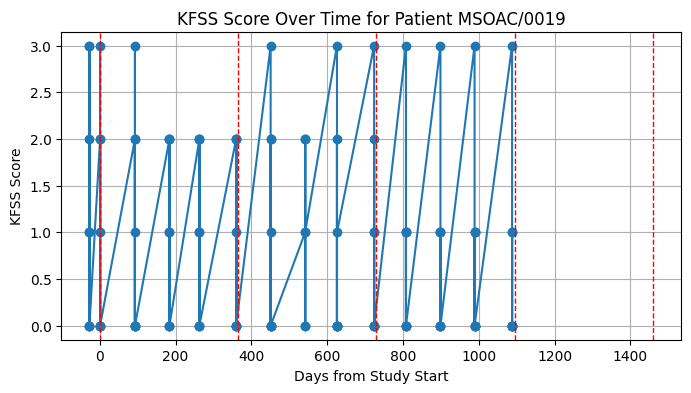

In [826]:
patient_id = 'MSOAC/0019'
#patient_id = 'MSOAC/0031'
#patient_id = 'MSOAC/9980'

#test = 'KFSS1-Bowel and Bladder Functions'

# Filter the DataFrame for the specific patient
patient_data = KFSS_qs[KFSS_qs['USUBJID'] == patient_id]
#patient_data = patient_data[patient_data['QSTEST'] == test]

# Plot the EDSS score over time
plt.figure(figsize=(8, 4))
plt.plot(patient_data['QSDY'], patient_data['QSSTRESN'], marker='o')
plt.title(f'KFSS Score Over Time for Patient {patient_id}') # and Test {test}
plt.xlabel('Days from Study Start')
plt.ylabel('KFSS Score')
plt.grid(True)

# Set y-axis ticks in increments of 0.5, starting from the minimal value
#min_value = patient_data['QSSTRESN'].min()
#max_value = patient_data['QSSTRESN'].max()
#plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [0, 365, 730, 1095, 1460]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)
plt.show()

In [827]:
patient_data = patient_data[patient_data['QSDY'] == -27.0]
patient_data

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,QSDY
214059,MSOAC/0019,KFSS1-Pyramidal Functions,KFSS,NaN,3,3,3.0,-27.0
214060,MSOAC/0019,KFSS1-Cerebellar Functions,KFSS,NaN,0,0,0.0,-27.0
214061,MSOAC/0019,KFSS1-Brain Stem Functions,KFSS,NaN,1,1,1.0,-27.0
214062,MSOAC/0019,KFSS1-Sensory Functions,KFSS,NaN,3,3,3.0,-27.0
214063,MSOAC/0019,KFSS1-Bowel and Bladder Functions,KFSS,NaN,1,1,1.0,-27.0
214064,MSOAC/0019,KFSS1-Visual or Optic Functions,KFSS,NaN,2,2,2.0,-27.0
214065,MSOAC/0019,KFSS1-Cerebral or Mental Functions,KFSS,NaN,0,0,0.0,-27.0
214066,MSOAC/0019,KFSS1-Other Functions,KFSS,NaN,0,0,0.0,-27.0


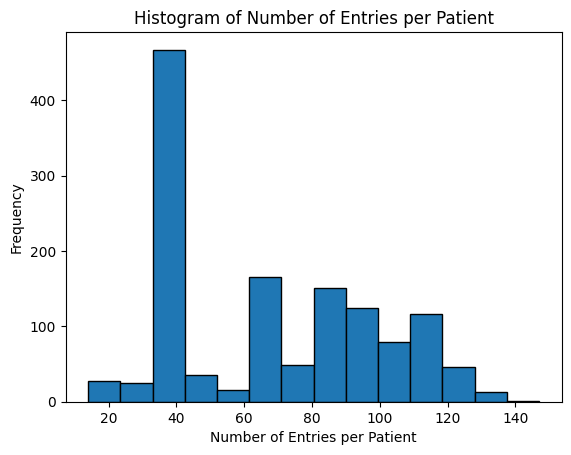

In [828]:
# Grouping by 'USUBJID' and counting the number of entries for each patient
patient_entries_count = KFSS_qs.groupby('USUBJID').size()

# Creating a histogram
plt.hist(patient_entries_count, bins='auto', edgecolor='black')
plt.xlabel('Number of Entries per Patient')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Entries per Patient')
plt.show()

In [829]:
KFSS_qs['QSDY'].describe()

count    89555.000000
mean       338.634091
std        310.189919
min       -127.000000
25%         85.000000
50%        254.000000
75%        586.000000
max       1404.000000
Name: QSDY, dtype: float64

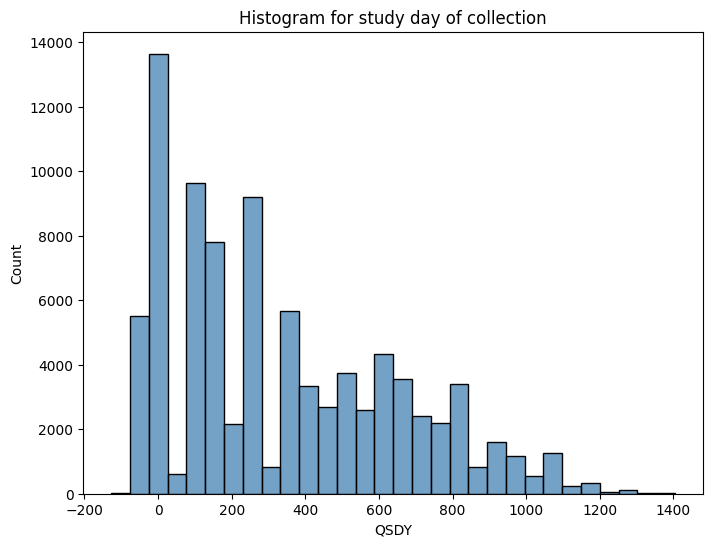

In [830]:
QSDY = KFSS_qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

It does not seem that we have specific days for the questionnaires to be answered

In [831]:
pivot_table = KFSS_qs.pivot_table(index='QSTEST', columns='QSSTRESN', aggfunc='size', fill_value=0)
pivot_table

QSSTRESN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0
QSTEST,,,,,,,,
KFSS1-Bowel and Bladder Functions,4564,3892,2586,824,354,31,15,0
KFSS1-Brain Stem Functions,6345,3292,2010,545,73,1,0,0
KFSS1-Cerebellar Functions,3448,2323,3165,2368,766,18,0,77
KFSS1-Cerebral or Mental Functions,8335,1592,2066,248,24,0,0,0
KFSS1-Other Functions,3235,567,0,0,0,0,0,0
KFSS1-Pyramidal Functions,1170,2442,2243,4909,1413,86,2,0
KFSS1-Sensory Functions,3800,2347,4106,1659,312,44,0,0
KFSS1-Visual or Optic Functions,5895,3121,2386,448,259,83,65,1


In [832]:
#put as NA rows with values 9 or 99
KFSS_qs['QSSTRESN'] = KFSS_qs['QSSTRESN'].replace([9, 99], pd.NA)

pivot_table = KFSS_qs.pivot_table(index='QSTEST', columns='QSSTRESN', aggfunc='size', fill_value=0)
pivot_table

QSSTRESN,0.0,1.0,2.0,3.0,4.0,5.0,6.0
QSTEST,,,,,,,
KFSS1-Bowel and Bladder Functions,4564,3892,2586,824,354,31,15
KFSS1-Brain Stem Functions,6345,3292,2010,545,73,1,0
KFSS1-Cerebellar Functions,3448,2323,3165,2368,766,18,0
KFSS1-Cerebral or Mental Functions,8335,1592,2066,248,24,0,0
KFSS1-Other Functions,3235,567,0,0,0,0,0
KFSS1-Pyramidal Functions,1170,2442,2243,4909,1413,86,2
KFSS1-Sensory Functions,3800,2347,4106,1659,312,44,0
KFSS1-Visual or Optic Functions,5895,3121,2386,448,259,83,65


Note: some tests are on a scale 0-5 and others 0-6!!
- scale 0-5: Cerebellar Functions, Brain Stem Functions, Cerebral or Mental Functions
- scale 0-6: others (except Other Functions)

0-Normal for all of them (except Other Functions)

*The KFSS component includes systems related to the brain (pyramidal, cerebellar, brainstem, sensory, and cerebral) as well as three body functioning systems: bowel and bladder, visual, and other*

So maybe group in two categories (BRAIN and BODY FUNCTIONING SYSTEM makes sense) - **put PHYSICAL and MENTAL to have the same names as the other datasets**

In [833]:
def assign_value(row):
    if row['QSTEST'] in ['KFSS1-Bowel and Bladder Functions', 'KFSS1-Other Functions', 'KFSS1-Visual or Optic Functions']:
        return 'PHYSICAL'
    else:
        return 'MENTAL'

# Apply the function row-wise to assign values to column D
KFSS_qs['QSSCAT'] = KFSS_qs.apply(assign_value, axis=1)

# Display the DataFrame
KFSS_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,QSDY
214059,MSOAC/0019,KFSS1-Pyramidal Functions,KFSS,MENTAL,3,3,3.0,-27.0
214060,MSOAC/0019,KFSS1-Cerebellar Functions,KFSS,MENTAL,0,0,0.0,-27.0
214061,MSOAC/0019,KFSS1-Brain Stem Functions,KFSS,MENTAL,1,1,1.0,-27.0
214062,MSOAC/0019,KFSS1-Sensory Functions,KFSS,MENTAL,3,3,3.0,-27.0
214063,MSOAC/0019,KFSS1-Bowel and Bladder Functions,KFSS,PHYSICAL,1,1,1.0,-27.0
...,...,...,...,...,...,...,...,...
83486,MSOAC/9998,KFSS1-Sensory Functions,KFSS,MENTAL,1,1,1.0,1072.0
83487,MSOAC/9998,KFSS1-Bowel and Bladder Functions,KFSS,PHYSICAL,1,1,1.0,1072.0
83488,MSOAC/9998,KFSS1-Visual or Optic Functions,KFSS,PHYSICAL,1,1,1.0,1072.0
83489,MSOAC/9998,KFSS1-Cerebral or Mental Functions,KFSS,MENTAL,0,0,0.0,1072.0


In [834]:
def set_scoremax(row):
    if row['QSTEST'] in ['KFSS1-Cerebellar Functions', 'KFSS1-Brain Stem Functions', 'KFSS1-Cerebral or Mental Functions']:
        return 5
    elif row['QSTEST'] in ['KFSS1-Other Functions']:
        return 1
    else:
        return 6

# Apply the function row-wise to set the values in column B
KFSS_qs['SCOREMAX'] = KFSS_qs.apply(set_scoremax, axis=1)
KFSS_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,QSDY,SCOREMAX
214059,MSOAC/0019,KFSS1-Pyramidal Functions,KFSS,MENTAL,3,3,3.0,-27.0,6
214060,MSOAC/0019,KFSS1-Cerebellar Functions,KFSS,MENTAL,0,0,0.0,-27.0,5
214061,MSOAC/0019,KFSS1-Brain Stem Functions,KFSS,MENTAL,1,1,1.0,-27.0,5
214062,MSOAC/0019,KFSS1-Sensory Functions,KFSS,MENTAL,3,3,3.0,-27.0,6
214063,MSOAC/0019,KFSS1-Bowel and Bladder Functions,KFSS,PHYSICAL,1,1,1.0,-27.0,6
...,...,...,...,...,...,...,...,...,...
83486,MSOAC/9998,KFSS1-Sensory Functions,KFSS,MENTAL,1,1,1.0,1072.0,6
83487,MSOAC/9998,KFSS1-Bowel and Bladder Functions,KFSS,PHYSICAL,1,1,1.0,1072.0,6
83488,MSOAC/9998,KFSS1-Visual or Optic Functions,KFSS,PHYSICAL,1,1,1.0,1072.0,6
83489,MSOAC/9998,KFSS1-Cerebral or Mental Functions,KFSS,MENTAL,0,0,0.0,1072.0,5


For BRAIN: total score of all 5 tests is 5+5+5+6+6=27
For BFS: total score of 3 tests is 6+6+2=14

In [835]:
grouped_sum = KFSS_qs.groupby(['USUBJID', 'QSDY', 'QSSCAT']).agg({'QSSTRESN': 'sum', 'SCOREMAX': 'sum'}).reset_index()
grouped_sum

,USUBJID,QSDY,QSSCAT,QSSTRESN,SCOREMAX
0,MSOAC/0019,-27.0,MENTAL,7.0,27
1,MSOAC/0019,-27.0,PHYSICAL,3.0,13
2,MSOAC/0019,1.0,MENTAL,6.0,27
3,MSOAC/0019,1.0,PHYSICAL,2.0,13
4,MSOAC/0019,93.0,MENTAL,6.0,27
...,...,...,...,...,...
24522,MSOAC/9998,890.0,PHYSICAL,1.0,13
24523,MSOAC/9998,981.0,MENTAL,8.0,27
24524,MSOAC/9998,981.0,PHYSICAL,1.0,12
24525,MSOAC/9998,1072.0,MENTAL,10.0,27


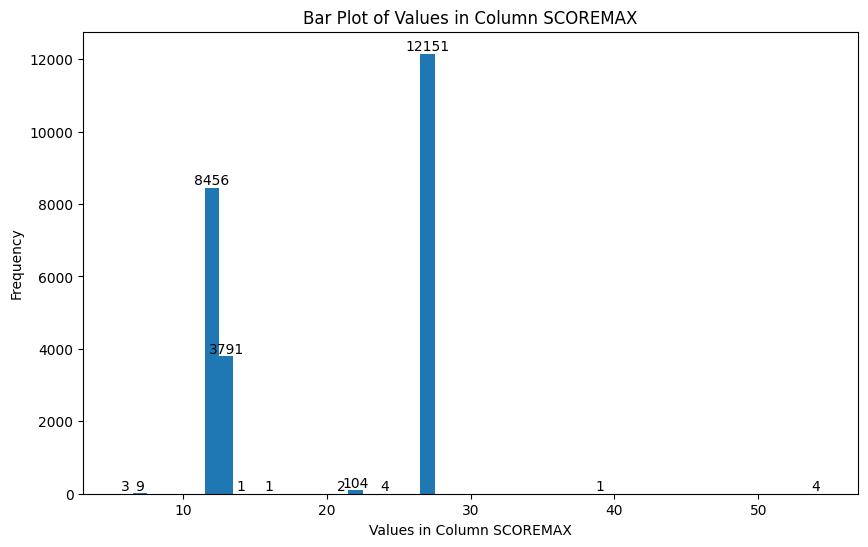

In [836]:
# Count the occurrences of each unique value in column A
value_counts = grouped_sum['SCOREMAX'].value_counts()

plt.figure(figsize=(10, 6))
# Plot the bar plot
plt.bar(value_counts.index, value_counts.values, width=1)

# Add labels and title
plt.xlabel('Values in Column SCOREMAX')
plt.ylabel('Frequency')
plt.title('Bar Plot of Values in Column SCOREMAX')

for i, count in enumerate(value_counts.values):
    plt.text(value_counts.index[i], count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

Makes sense that we have a lot of values as 12 and not 14 because of the KFSS1-Other Questions is not asked often

In [837]:
unique_values = grouped_sum['SCOREMAX'].unique()

# Print the unique values
print(unique_values)

[27 13 16 12  6 54 24 22  7 21 39 14]


Values 6 and 8 might indicate that for a certain patient at a certain time, only 1 or 2 exams were done

In [838]:
grouped_sum.rename(columns={'QSSTRESN': 'TOTALSCORE'}, inplace=True)
grouped_sum.rename(columns={'SCOREMAX': 'TOTALMAXSCORE'}, inplace=True)

grouped_sum['QSPERC'] = grouped_sum['TOTALSCORE'] / grouped_sum['TOTALMAXSCORE'] 
KFSS_qs = grouped_sum 
KFSS_qs.head(30)

,USUBJID,QSDY,QSSCAT,TOTALSCORE,TOTALMAXSCORE,QSPERC
0,MSOAC/0019,-27.0,MENTAL,7.0,27,0.259259
1,MSOAC/0019,-27.0,PHYSICAL,3.0,13,0.230769
2,MSOAC/0019,1.0,MENTAL,6.0,27,0.222222
3,MSOAC/0019,1.0,PHYSICAL,2.0,13,0.153846
4,MSOAC/0019,93.0,MENTAL,6.0,27,0.222222
5,MSOAC/0019,93.0,PHYSICAL,2.0,13,0.153846
6,MSOAC/0019,184.0,MENTAL,5.0,27,0.185185
7,MSOAC/0019,184.0,PHYSICAL,3.0,13,0.230769
8,MSOAC/0019,263.0,MENTAL,5.0,27,0.185185
9,MSOAC/0019,263.0,PHYSICAL,3.0,13,0.230769


In [839]:
KFSS_qs = KFSS_qs.drop(columns=['TOTALSCORE','TOTALMAXSCORE'])
KFSS_qs

,USUBJID,QSDY,QSSCAT,QSPERC
0,MSOAC/0019,-27.0,MENTAL,0.259259
1,MSOAC/0019,-27.0,PHYSICAL,0.230769
2,MSOAC/0019,1.0,MENTAL,0.222222
3,MSOAC/0019,1.0,PHYSICAL,0.153846
4,MSOAC/0019,93.0,MENTAL,0.222222
...,...,...,...,...
24522,MSOAC/9998,890.0,PHYSICAL,0.076923
24523,MSOAC/9998,981.0,MENTAL,0.296296
24524,MSOAC/9998,981.0,PHYSICAL,0.083333
24525,MSOAC/9998,1072.0,MENTAL,0.37037


In [840]:
# Create subsets for different time periods
before_study_start = KFSS_qs[KFSS_qs['QSDY'] <= 1]
one_year_after_start = KFSS_qs[(KFSS_qs['QSDY'] > 1) & (KFSS_qs['QSDY'] <= 365)]
two_years_after_start = KFSS_qs[(KFSS_qs['QSDY'] > 365) & (KFSS_qs['QSDY'] <= 730)]
more_than_two_years_after_start = KFSS_qs[KFSS_qs['QSDY'] > 730]

# Function to count observations for a given subset
def count_observations(subset, title):
    outcome_measure_counts = subset.groupby(['QSSCAT', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('QSSCAT')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')


Before Study Start


,count,mean,std,min,25%,50%,75%,max
QSSCAT,,,,,,,,
MENTAL,1317.0,1.998481,0.067505,1.0,2.0,2.0,2.0,3.0
PHYSICAL,1317.0,1.998481,0.067505,1.0,2.0,2.0,2.0,3.0


In [841]:
count_observations(one_year_after_start, '1 Year After Study Start')


1 Year After Study Start


,count,mean,std,min,25%,50%,75%,max
QSSCAT,,,,,,,,
MENTAL,1310.0,3.745802,0.889782,1.0,3.0,4.0,4.0,10.0
PHYSICAL,1310.0,3.746565,0.888712,1.0,3.0,4.0,4.0,10.0


In [842]:
count_observations(two_years_after_start, '2 Years After Study Start')


2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSSCAT,,,,,,,,
MENTAL,771.0,4.083009,0.851803,1.0,4.0,4.0,4.0,8.0
PHYSICAL,771.0,4.083009,0.851803,1.0,4.0,4.0,4.0,8.0


In [843]:
count_observations(more_than_two_years_after_start, 'More Than 2 Years After Study Start')


More Than 2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSSCAT,,,,,,,,
MENTAL,530.0,2.973585,1.247781,1.0,2.0,2.0,4.0,8.0
PHYSICAL,530.0,2.973585,1.247781,1.0,2.0,2.0,4.0,8.0


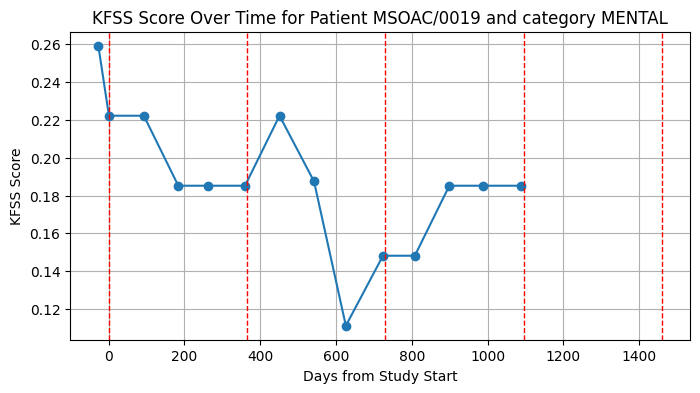

In [844]:
patient_id = 'MSOAC/0019'
#patient_id = 'MSOAC/0031'
#patient_id = 'MSOAC/9980'

category='PHYSICAL'
category='MENTAL'

# Filter the DataFrame for the specific patient
patient_data = KFSS_qs[KFSS_qs['USUBJID'] == patient_id]
patient_data = patient_data[patient_data['QSSCAT'] == category]


# Plot the EDSS score over time
plt.figure(figsize=(8, 4))
plt.plot(patient_data['QSDY'], patient_data['QSPERC'], marker='o')
plt.title(f'KFSS Score Over Time for Patient {patient_id} and category {category}')
plt.xlabel('Days from Study Start')
plt.ylabel('KFSS Score')
plt.grid(True)

# Set y-axis ticks in increments of 0.5, starting from the minimal value
#min_value = patient_data['QSSTRESN'].min()
#max_value = patient_data['QSSTRESN'].max()
#plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [0, 365, 730, 1095, 1460]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)
plt.show()

In [845]:
KFSS_qs = KFSS_qs.copy()  # Create a copy to avoid the warning


conditions = [
    (KFSS_qs['QSDY'] <= 1),
    ((KFSS_qs['QSDY'] > 1) & (KFSS_qs['QSDY'] <= 365)),
    ((KFSS_qs['QSDY'] > 365) & (KFSS_qs['QSDY'] <= 730)),
    ((KFSS_qs['QSDY'] > 730)) #& (KFSS_qs['QSDY'] <= 1095)),
    #((KFSS_qs['QSDY'] > 1095) & (KFSS_qs['QSDY'] <= 1460)) 
]

# Define corresponding values for each condition
values = ['before', '1y', '2y', 'after_2y'] # , '4y' - if i use this i have 93% missing in the time

# Create the new column "FT_PERIOD"
KFSS_qs['QS_PERIOD'] = np.select(conditions, values, default='NaN')
KFSS_qs = KFSS_qs.dropna(subset=['QSDY']) #Drop observations for which we don't have time of test
KFSS_qs

,USUBJID,QSDY,QSSCAT,QSPERC,QS_PERIOD
0,MSOAC/0019,-27.0,MENTAL,0.259259,before
1,MSOAC/0019,-27.0,PHYSICAL,0.230769,before
2,MSOAC/0019,1.0,MENTAL,0.222222,before
3,MSOAC/0019,1.0,PHYSICAL,0.153846,before
4,MSOAC/0019,93.0,MENTAL,0.222222,1y
...,...,...,...,...,...
24522,MSOAC/9998,890.0,PHYSICAL,0.076923,after_2y
24523,MSOAC/9998,981.0,MENTAL,0.296296,after_2y
24524,MSOAC/9998,981.0,PHYSICAL,0.083333,after_2y
24525,MSOAC/9998,1072.0,MENTAL,0.37037,after_2y


In [846]:
# Filtering based on the condition 'QSSCAT' == 'MENTAL'
brain_df = KFSS_qs[KFSS_qs['QSSCAT'] == 'MENTAL']

# Pivot table for 'BRAIN' category
grouped_brain_df = brain_df.pivot_table(values='QSPERC', index='USUBJID', columns='QS_PERIOD', aggfunc='median', fill_value=None).reset_index()
grouped_brain_df.columns = ['USUBJID'] + [f"KFSS_M-{period}" for period in grouped_brain_df.columns[1:]]

# Filtering based on the condition 'QSSCAT' != 'BRAIN' (no need to check both cases)
non_brain_df = KFSS_qs[KFSS_qs['QSSCAT'] == 'PHYSICAL']

# Pivot table for non-'BRAIN' category
grouped_non_brain_df = non_brain_df.pivot_table(values='QSPERC', index='USUBJID', columns='QS_PERIOD', aggfunc='median', fill_value=None).reset_index()
grouped_non_brain_df.columns = ['USUBJID'] + [f"KFSS_P-{period}" for period in grouped_non_brain_df.columns[1:]]

# Merge the new DataFrames with the original DataFrame on 'USUBJID'
result_KFSS = pd.merge(KFSS_qs[['USUBJID']], grouped_brain_df, on='USUBJID', how='left')
result_KFSS = pd.merge(result_KFSS, grouped_non_brain_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient and period
result_KFSS = result_KFSS.drop_duplicates(subset=['USUBJID'])

# Display the resulting DataFrame
result_KFSS#.head(20)

,USUBJID,KFSS_M-1y,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-1y,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before
0,MSOAC/0019,0.185185,0.167824,0.185185,0.240741,0.192308,0.230769,0.076923,0.192308
28,MSOAC/0024,0.12963,0.148148,NaN,0.240741,0.416667,0.25,NaN,0.375
48,MSOAC/0030,0.111111,NaN,NaN,0.203704,0.166667,NaN,NaN,0.125
58,MSOAC/0031,0.074074,0.037037,0.037037,0.018519,0.0,0.0,0.0,0.041667
86,MSOAC/0046,0.222222,NaN,NaN,0.222222,0.083333,NaN,NaN,0.083333
...,...,...,...,...,...,...,...,...,...
24433,MSOAC/9976,0.074074,0.074074,0.074074,0.074074,0.0,0.0,0.0,0.0
24457,MSOAC/9980,0.259259,NaN,NaN,0.259259,0.0,NaN,NaN,0.0
24469,MSOAC/9985,0.259259,0.259259,NaN,0.314815,0.166667,0.25,NaN,0.291667
24489,MSOAC/9986,0.111111,NaN,NaN,0.148148,0.166667,NaN,NaN,0.125


In [847]:
# Calculate the percentage of missing values for each column
missing_percentage = result_KFSS.isnull().mean() * 100

# Sort columns based on missing percentage in descending order
sorted_columns = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values for each column in result_EDSS (sorted high to low):")
print(sorted_columns)

Percentage of missing values for each column in result_EDSS (sorted high to low):
KFSS_M-after_2y    59.757024
KFSS_P-after_2y    59.757024
KFSS_M-2y          41.457859
KFSS_P-2y          41.457859
KFSS_M-1y           0.531511
KFSS_P-1y           0.531511
USUBJID             0.000000
KFSS_M-before       0.000000
KFSS_P-before       0.000000
dtype: float64


Idea: 
- sum results of all tests per patient (and normalize)
- 9 and 99 means missing!!!

#### RAND-36 V1.0

In [848]:
RAND36_qs = qs[qs['QSCAT'] == 'RAND-36 V1.0']
RAND36_qs = RAND36_qs.drop(columns=['QSSEQ','QSSTRESC','VISITNUM','VISIT'])
RAND36_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESN,QSDY,QSEVLINT
17,MSOAC/0019,R3601-Would You Say Your Health Is,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1.0,NaN
22,MSOAC/0019,R3601-Health Now Compared to 1 Year Ago,RAND-36 V1.0,HEALTH CHANGE,4,4.0,1.0,NaN
25,MSOAC/0019,R3601-Health Limit Vigorous Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,1,1.0,1.0,NaN
26,MSOAC/0019,R3601-Health Limit Moderate Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN
27,MSOAC/0019,R3601-Health Limit Carrying Groceries,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN
...,...,...,...,...,...,...,...,...
83481,MSOAC/9998,R3601-Amt Time Interfere Social Activity,RAND-36 V1.0,SOCIAL FUNCTIONING,3,3.0,1072.0,-P4W
83456,MSOAC/9998,R3601-Get Sick Easier Than Other People,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN
83457,MSOAC/9998,R3601-I Am as Healthy as Anybody I Know,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN
83458,MSOAC/9998,R3601-I Expect My Health to Get Worse,RAND-36 V1.0,GENERAL HEALTH,2,2.0,1072.0,NaN


In [849]:
unique_usubjid_rand36_count = RAND36_qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_rand36_count)

Number of unique values in USUBJID: 1064


In [850]:
missing_percentage_rand36 = (RAND36_qs.isnull().sum() / len(RAND36_qs)) * 100
missing_rand36 = pd.DataFrame({'Column Name': missing_percentage_rand36.index, 'Missing Percentage': missing_percentage_rand36.values})
missing_rand36 = missing_rand36.sort_values(by='Missing Percentage', ascending=False)
print(missing_rand36)

  Column Name  Missing Percentage
7    QSEVLINT           44.448627
4     QSORRES            1.169285
5    QSSTRESN            0.842663
6        QSDY            0.529396
3      QSSCAT            0.000607
0     USUBJID            0.000000
1      QSTEST            0.000000
2       QSCAT            0.000000


In [851]:
QSDY = RAND36_qs['QSDY']
QSDY.describe()

count    163844.000000
mean        412.450868
std         332.330091
min       -2220.000000
25%         168.000000
50%         365.000000
75%         726.000000
max        1303.000000
Name: QSDY, dtype: float64

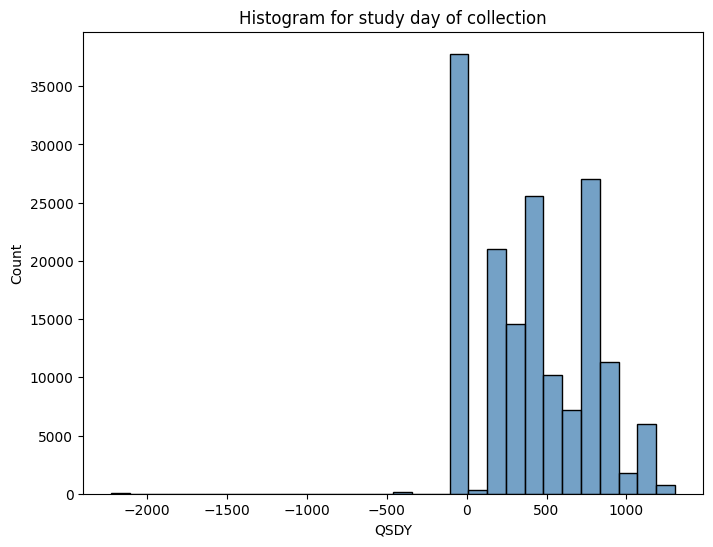

In [852]:
QSDY = RAND36_qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

We again here do not seem to have specific times to answer the questionnaires

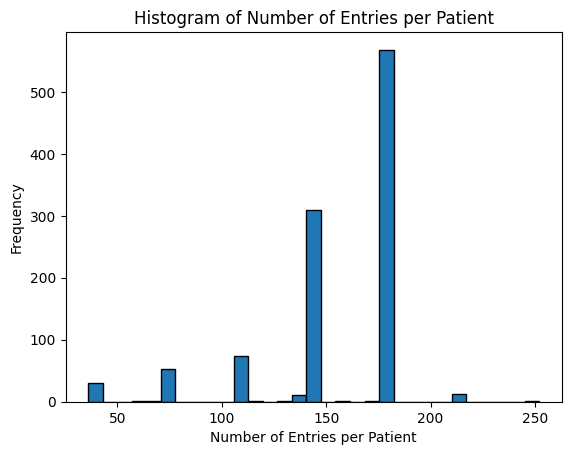

In [853]:
# Grouping by 'USUBJID' and counting the number of entries for each patient
patient_entries_count = RAND36_qs.groupby('USUBJID').size()

# Creating a histogram
plt.hist(patient_entries_count, bins='auto', edgecolor='black')
plt.xlabel('Number of Entries per Patient')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Entries per Patient')
plt.show()

In [854]:
result_table = RAND36_qs.groupby(['USUBJID', 'QSDY']).size().reset_index(name='Count')
result_table

,USUBJID,QSDY,Count
0,MSOAC/0019,1.0,36
1,MSOAC/0019,360.0,36
2,MSOAC/0019,724.0,36
3,MSOAC/0019,899.0,36
4,MSOAC/0024,1.0,36
...,...,...,...
4552,MSOAC/9985,668.0,36
4553,MSOAC/9998,1.0,36
4554,MSOAC/9998,358.0,36
4555,MSOAC/9998,715.0,36


In [855]:
filtered_result_table = result_table[result_table['Count'] != 36]
filtered_result_table

,USUBJID,QSDY,Count
6,MSOAC/0024,417.0,34
73,MSOAC/0149,423.0,35
123,MSOAC/0216,430.0,24
214,MSOAC/0448,344.0,34
215,MSOAC/0448,421.0,35
...,...,...,...
4260,MSOAC/9404,347.0,35
4362,MSOAC/9641,675.0,35
4379,MSOAC/9676,354.0,35
4411,MSOAC/9718,343.0,35


In [856]:
filtered_result_table = result_table[(result_table['Count'] != 36) & (result_table['Count'] != 35)]
filtered_result_table

,USUBJID,QSDY,Count
6,MSOAC/0024,417.0,34
123,MSOAC/0216,430.0,24
214,MSOAC/0448,344.0,34
445,MSOAC/1046,343.0,27
447,MSOAC/1046,672.0,37
469,MSOAC/1138,358.0,27
502,MSOAC/1193,721.0,37
996,MSOAC/2370,415.0,34
1084,MSOAC/2593,331.0,33
1162,MSOAC/2722,365.0,26


In [857]:
filtered_result_table = result_table[result_table['Count'] > 36]
filtered_result_table

,USUBJID,QSDY,Count
447,MSOAC/1046,672.0,37
502,MSOAC/1193,721.0,37
1559,MSOAC/3582,1.0,38
4195,MSOAC/9266,1.0,37
4199,MSOAC/9270,1.0,37


*might do the mean for the questionnaire that is repeated*

Change plot cause in every QSDY a patient does all 36 questionnaires!!

In [858]:
pivot_table = RAND36_qs.pivot_table(index='QSTEST', columns='QSSTRESN', aggfunc='size', fill_value=0)
pivot_table

QSSTRESN,1.0,2.0,3.0,4.0,5.0,6.0
QSTEST,,,,,,
R3601-Amt Time Interfere Social Activity,150,548,1296,1131,1370,0
R3601-Did Pain Interfere With Your Work,1967,1091,899,480,98,0
R3601-Did You Feel Full of Pep,163,684,762,1257,1040,631
R3601-Did You Feel Tired,469,851,1085,1316,666,155
R3601-Did You Feel Worn Out,246,649,927,1318,978,419
R3601-Did You Have a Lot of Energy,117,560,673,1120,1191,872
R3601-Emotional Problem: Accomplish Less,1881,2656,0,0,0,0
R3601-Emotional Problem: Cut Work Time,1393,3142,0,0,0,0
R3601-Emotional Problem: Less Careful,1330,3194,0,0,0,0


In [859]:
# QSTEST
qsscat_counts_qs = RAND36_qs['QSTEST'].value_counts().reset_index()
qsscat_counts_qs.columns = ['QSTEST', 'Count']
total_count = qsscat_counts_qs['Count'].sum()
#qsscat_counts_qs['Percentage'] = (qsscat_counts_qs['Count'] / total_count) * 100
qsscat_counts_qs

,QSTEST,Count
0,R3601-Health Now Compared to 1 Year Ago,4581
1,R3601-I Am as Healthy as Anybody I Know,4580
2,R3601-Health Limit Climb Several Flights,4580
3,R3601-Health Limit Walk Several Blocks,4580
4,R3601-I Expect My Health to Get Worse,4579
5,R3601-Have Felt So Down in the Dumps,4579
6,R3601-Health Limit Vigorous Activities,4578
7,R3601-Health Limit Moderate Activities,4578
8,R3601-Health Limit Climb One Flight,4578
9,R3601-Have Felt Downhearted and Blue,4578


In [860]:
qsscat_counts_qs = qsscat_counts_qs[qsscat_counts_qs['QSTEST'] != 'Questionaire']
qsscat_counts_qs

,QSTEST,Count
0,R3601-Health Now Compared to 1 Year Ago,4581
1,R3601-I Am as Healthy as Anybody I Know,4580
2,R3601-Health Limit Climb Several Flights,4580
3,R3601-Health Limit Walk Several Blocks,4580
4,R3601-I Expect My Health to Get Worse,4579
5,R3601-Have Felt So Down in the Dumps,4579
6,R3601-Health Limit Vigorous Activities,4578
7,R3601-Health Limit Moderate Activities,4578
8,R3601-Health Limit Climb One Flight,4578
9,R3601-Have Felt Downhearted and Blue,4578


In [861]:
# QSSCAT
qsscat_counts_qs = RAND36_qs['QSSCAT'].value_counts().reset_index()
qsscat_counts_qs.columns = ['QSSCAT', 'Count']
total_count = qsscat_counts_qs['Count'].sum()
qsscat_counts_qs['Percentage'] = (qsscat_counts_qs['Count'] / total_count) * 100
qsscat_counts_qs

,QSSCAT,Count,Percentage
0,PHYSICAL FUNCTIONING,45777,27.791640
1,EMOTIONAL WELL-BEING,22887,13.894909
2,GENERAL HEALTH,22855,13.875482
3,ROLE LIMITATIONS DUE TO PHYSICAL HEALTH,18305,11.113135
4,ENERGY/FATIGUE,18304,11.112528
5,ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS,13718,8.328325
6,PAIN,9149,5.554443
7,SOCIAL FUNCTIONING,9139,5.548371
8,HEALTH CHANGE,4581,2.781167


See scale for each category of questionnaire

In [862]:
# PHYSICAL FUNCTIONING
phys_funct = RAND36_qs[RAND36_qs['QSSCAT'] == 'PHYSICAL FUNCTIONING']

qsstresn_counts_qs = phys_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,19542,42.958892
1,2.0,14507,31.890525
2,3.0,11441,25.150583


In [863]:
phys_funct_per_qsteet = phys_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_funct_per_qsteet = phys_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_funct_per_qsteet

,QSTEST,QSSTRESN,Count
2,R3601-Health Limit Bathing/Dressing Self,1.0,403
1,R3601-Health Limit Bathing/Dressing Self,2.0,1761
0,R3601-Health Limit Bathing/Dressing Self,3.0,2396
4,R3601-Health Limit Bending or Kneeling,1.0,1430
3,R3601-Health Limit Bending or Kneeling,2.0,1929
5,R3601-Health Limit Bending or Kneeling,3.0,1189
7,R3601-Health Limit Carrying Groceries,1.0,1608
6,R3601-Health Limit Carrying Groceries,2.0,1814
8,R3601-Health Limit Carrying Groceries,3.0,1122
11,R3601-Health Limit Climb One Flight,1.0,1161


In [864]:
# EMOTIONAL WELL-BEING
emotion = RAND36_qs[RAND36_qs['QSSCAT'] == 'EMOTIONAL WELL-BEING']

qsstresn_counts_qs = emotion['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,6.0,5702,25.132228
1,5.0,4982,21.958745
2,4.0,4566,20.125176
3,2.0,3588,15.814528
4,3.0,2815,12.407440
5,1.0,1035,4.561883


In [865]:
emotion_per_qsteet = emotion.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
emotion_per_qsteet = emotion_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
emotion_per_qsteet

,QSTEST,QSSTRESN,Count
5,R3601-Have Been a Very Nervous Person,1.0,73
4,R3601-Have Been a Very Nervous Person,2.0,174
3,R3601-Have Been a Very Nervous Person,3.0,387
2,R3601-Have Been a Very Nervous Person,4.0,1002
1,R3601-Have Been a Very Nervous Person,5.0,1325
0,R3601-Have Been a Very Nervous Person,6.0,1583
11,R3601-Have Felt Downhearted and Blue,1.0,62
10,R3601-Have Felt Downhearted and Blue,2.0,176
9,R3601-Have Felt Downhearted and Blue,3.0,361
8,R3601-Have Felt Downhearted and Blue,4.0,970


In [866]:
# GENERAL HEALTH
gen_health = RAND36_qs[RAND36_qs['QSSCAT'] == 'GENERAL HEALTH']

qsstresn_counts_qs = gen_health['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,5681,25.131608
1,2.0,5303,23.459412
2,4.0,5278,23.348817
3,5.0,4353,19.256802
4,1.0,1990,8.803362


In [867]:
gen_health_per_qsteet = gen_health.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
gen_health_per_qsteet = gen_health_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
gen_health_per_qsteet

,QSTEST,QSSTRESN,Count
4,R3601-Get Sick Easier Than Other People,1.0,159
3,R3601-Get Sick Easier Than Other People,2.0,473
2,R3601-Get Sick Easier Than Other People,3.0,808
1,R3601-Get Sick Easier Than Other People,4.0,1416
0,R3601-Get Sick Easier Than Other People,5.0,1673
9,R3601-I Am as Healthy as Anybody I Know,1.0,684
5,R3601-I Am as Healthy as Anybody I Know,2.0,1417
8,R3601-I Am as Healthy as Anybody I Know,3.0,689
6,R3601-I Am as Healthy as Anybody I Know,4.0,983
7,R3601-I Am as Healthy as Anybody I Know,5.0,757


In [868]:
# ROLE LIMITATIONS DUE TO PHYSICAL HEALTH
phys_health = RAND36_qs[RAND36_qs['QSSCAT'] == 'ROLE LIMITATIONS DUE TO PHYSICAL HEALTH']

qsstresn_counts_qs = phys_health['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,10799,59.495345
1,2.0,7352,40.504655


In [869]:
phys_health_per_qsteet = phys_health.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_health_per_qsteet = phys_health_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_health_per_qsteet

,QSTEST,QSSTRESN,Count
0,R3601-Phys Health: Accomplish Less,1.0,2934
1,R3601-Phys Health: Accomplish Less,2.0,1598
3,R3601-Phys Health: Cut Work Time,1.0,2142
2,R3601-Phys Health: Cut Work Time,2.0,2389
4,R3601-Phys Health: Difficulty Performing,1.0,2855
5,R3601-Phys Health: Difficulty Performing,2.0,1690
6,R3601-Phys Health: Limit Kind of Work,1.0,2868
7,R3601-Phys Health: Limit Kind of Work,2.0,1675


In [870]:
# ENERGY/FATIGUE
energy_fatigue = RAND36_qs[RAND36_qs['QSSCAT'] == 'ENERGY/FATIGUE']

qsstresn_counts_qs = energy_fatigue['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,4.0,5011,27.610337
1,5.0,3875,21.351039
2,3.0,3447,18.992782
3,2.0,2744,15.119290
4,6.0,2077,11.444157
5,1.0,995,5.482396


In [871]:
energy_fatigue_per_qsteet = energy_fatigue.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
energy_fatigue_per_qsteet = energy_fatigue_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
energy_fatigue_per_qsteet

,QSTEST,QSSTRESN,Count
5,R3601-Did You Feel Full of Pep,1.0,163
3,R3601-Did You Feel Full of Pep,2.0,684
2,R3601-Did You Feel Full of Pep,3.0,762
0,R3601-Did You Feel Full of Pep,4.0,1257
1,R3601-Did You Feel Full of Pep,5.0,1040
4,R3601-Did You Feel Full of Pep,6.0,631
10,R3601-Did You Feel Tired,1.0,469
8,R3601-Did You Feel Tired,2.0,851
7,R3601-Did You Feel Tired,3.0,1085
6,R3601-Did You Feel Tired,4.0,1316


In [872]:
# ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS
emotion_prob = RAND36_qs[RAND36_qs['QSSCAT'] == 'ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS']

qsstresn_counts_qs = emotion_prob['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,2.0,8992,66.137099
1,1.0,4604,33.862901


In [873]:
emotion_prob_per_qsteet = emotion_prob.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
emotion_prob_per_qsteet = emotion_prob_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
emotion_prob_per_qsteet

,QSTEST,QSSTRESN,Count
1,R3601-Emotional Problem: Accomplish Less,1.0,1881
0,R3601-Emotional Problem: Accomplish Less,2.0,2656
3,R3601-Emotional Problem: Cut Work Time,1.0,1393
2,R3601-Emotional Problem: Cut Work Time,2.0,3142
5,R3601-Emotional Problem: Less Careful,1.0,1330
4,R3601-Emotional Problem: Less Careful,2.0,3194


In [874]:
# PAIN
pain = RAND36_qs[RAND36_qs['QSSCAT'] == 'PAIN']

qsstresn_counts_qs = pain['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,3224,35.494881
1,2.0,2027,22.316415
2,3.0,1703,18.749312
3,4.0,1630,17.945613
4,5.0,455,5.009358
5,6.0,44,0.484421


In [875]:
pain_per_qsteet = pain.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
pain_per_qsteet = pain_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
pain_per_qsteet

,QSTEST,QSSTRESN,Count
0,R3601-Did Pain Interfere With Your Work,1.0,1967
1,R3601-Did Pain Interfere With Your Work,2.0,1091
2,R3601-Did Pain Interfere With Your Work,3.0,899
3,R3601-Did Pain Interfere With Your Work,4.0,480
4,R3601-Did Pain Interfere With Your Work,5.0,98
5,R3601-How Much Bodily Pain Have You Had,1.0,1257
7,R3601-How Much Bodily Pain Have You Had,2.0,936
8,R3601-How Much Bodily Pain Have You Had,3.0,804
6,R3601-How Much Bodily Pain Have You Had,4.0,1150
9,R3601-How Much Bodily Pain Have You Had,5.0,357


In [876]:
# SOCIAL FUNCTIONING
social_funct = RAND36_qs[RAND36_qs['QSSCAT'] == 'SOCIAL FUNCTIONING']

qsstresn_counts_qs = social_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,2301,25.509978
1,2.0,1836,20.354767
2,4.0,1776,19.689579
3,1.0,1602,17.760532
4,5.0,1505,16.685144


In [877]:
social_funct_per_qsteet = social_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
social_funct_per_qsteet = social_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
social_funct_per_qsteet

,QSTEST,QSSTRESN,Count
4,R3601-Amt Time Interfere Social Activity,1.0,150
3,R3601-Amt Time Interfere Social Activity,2.0,548
1,R3601-Amt Time Interfere Social Activity,3.0,1296
2,R3601-Amt Time Interfere Social Activity,4.0,1131
0,R3601-Amt Time Interfere Social Activity,5.0,1370
5,R3601-Extent Interfered Social Activity,1.0,1452
6,R3601-Extent Interfered Social Activity,2.0,1288
7,R3601-Extent Interfered Social Activity,3.0,1005
8,R3601-Extent Interfered Social Activity,4.0,645
9,R3601-Extent Interfered Social Activity,5.0,135


In [878]:
# HEALTH CHANGE
health_change = RAND36_qs[RAND36_qs['QSSCAT'] == 'HEALTH CHANGE']

qsstresn_counts_qs = health_change['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,2012,44.258689
1,4.0,1627,35.789705
2,2.0,465,10.228773
3,5.0,236,5.191377
4,1.0,206,4.531456


In [879]:
health_change_per_qsteet = health_change.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
health_change_per_qsteet = health_change_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
health_change_per_qsteet

,QSTEST,QSSTRESN,Count
4,R3601-Health Now Compared to 1 Year Ago,1.0,206
2,R3601-Health Now Compared to 1 Year Ago,2.0,465
0,R3601-Health Now Compared to 1 Year Ago,3.0,2012
1,R3601-Health Now Compared to 1 Year Ago,4.0,1627
3,R3601-Health Now Compared to 1 Year Ago,5.0,236


*Conclusion:* all questions per QSSCAT use the SAME likert-scale (except for PAIN) 

*Sofia*: what i mean is that in a category all use a 5 likert scale for example, or a 6 likert scale. But in pain, one uses 5 and other uses 6

In [880]:
#pivot_table = RAND36_qs.pivot_table(index='QSTEST', columns='QSSTRESN', values='QSORRES', aggfunc='first')
#grouped = RAND36_qs.groupby(['QSTEST', 'QSSTRESN'])['QSORRES'].apply(list).reset_index()
filtered = RAND36_qs[RAND36_qs['QSSCAT'] == 'PAIN']
grouped = filtered.groupby(['QSTEST', 'QSSTRESN'])['QSORRES'].agg(lambda x: list(set(x))).reset_index()
pivot_table = grouped.pivot_table(index='QSTEST', columns='QSSTRESN', values='QSORRES', aggfunc=lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)
pivot_table

QSSTRESN,1.0,2.0,3.0,4.0,5.0,6.0
QSTEST,,,,,,
R3601-Did Pain Interfere With Your Work,"[1, Not at all]","[A little bit, 2]","[3, Moderately]","[4, Quite a bit]","[Extremely, 5]",NaN
R3601-How Much Bodily Pain Have You Had,"[1, nan]","[Very Mild, 2, Very mild]","[Mild, 3]","[Moderate, 4]","[Severe, 5]","[Very Severe, Very severe, 6]"


In [881]:
p0019 = RAND36_qs[RAND36_qs['USUBJID'] == 'MSOAC/4157']
#p0019 = p0019[p0019['QSTEST'] == 'R3601-I Expect My Health to Get Worse']
p0019['QSDY'].unique() 
#p0019

array([-14., 184., 359., 552., 728.])

*Copied from SF-12*

the scores are combined and transformed to generate two summary measures: *the Physical Component Summary (PCS) and the Mental Component Summary (MCS)*. These summary measures provide an overview of a person's physical and mental health status, respectively.

Physical:
- general health (5 question)
- physical functioning (10 questions)
- health change (1 question)
- pain (2 question)
- role limitations due to physical health (4 questions)

Mental:
- energy/fatigue (4 questions)
- emotional well-being (5 questions)
- social functioning (2 question)
- role limitations due to emotional problems (3 questions)

In [882]:
def assign_value(row):
    if row['QSSCAT'] in ['PHYSICAL FUNCTIONING', 'GENERAL HEALTH', 'ROLE LIMITATIONS DUE TO PHYSICAL HEALTH', 'PAIN', 'HEALTH CHANGE']:
        return 'PHYSICAL'
    else:
        return 'MENTAL'

# Apply the function row-wise to assign values to desired column 
RAND36_qs['QSNEWCAT'] = RAND36_qs.apply(assign_value, axis=1)

# Display the DataFrame
RAND36_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESN,QSDY,QSEVLINT,QSNEWCAT
17,MSOAC/0019,R3601-Would You Say Your Health Is,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1.0,NaN,PHYSICAL
22,MSOAC/0019,R3601-Health Now Compared to 1 Year Ago,RAND-36 V1.0,HEALTH CHANGE,4,4.0,1.0,NaN,PHYSICAL
25,MSOAC/0019,R3601-Health Limit Vigorous Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,1,1.0,1.0,NaN,PHYSICAL
26,MSOAC/0019,R3601-Health Limit Moderate Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN,PHYSICAL
27,MSOAC/0019,R3601-Health Limit Carrying Groceries,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN,PHYSICAL
...,...,...,...,...,...,...,...,...,...
83481,MSOAC/9998,R3601-Amt Time Interfere Social Activity,RAND-36 V1.0,SOCIAL FUNCTIONING,3,3.0,1072.0,-P4W,MENTAL
83456,MSOAC/9998,R3601-Get Sick Easier Than Other People,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN,PHYSICAL
83457,MSOAC/9998,R3601-I Am as Healthy as Anybody I Know,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN,PHYSICAL
83458,MSOAC/9998,R3601-I Expect My Health to Get Worse,RAND-36 V1.0,GENERAL HEALTH,2,2.0,1072.0,NaN,PHYSICAL


In [883]:
def set_scoremax(row):
    if row['QSSCAT'] in ['PHYSICAL FUNCTIONING']:
        return 3
    elif row['QSSCAT'] in ['ROLE LIMITATIONS DUE TO PHYSICAL HEALTH','ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS']:
        return 2
    elif (row['QSSCAT'] in ['EMOTIONAL WELL-BEING','ENERGY/FATIGUE']) or (row['QSTEST'] in ['R3601-How Much Bodily Pain Have You Had']):
        return 6
    else:
        return 5

# Apply the function row-wise to set the values in column B
RAND36_qs['SCOREMAX'] = RAND36_qs.apply(set_scoremax, axis=1)
RAND36_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESN,QSDY,QSEVLINT,QSNEWCAT,SCOREMAX
17,MSOAC/0019,R3601-Would You Say Your Health Is,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1.0,NaN,PHYSICAL,5
22,MSOAC/0019,R3601-Health Now Compared to 1 Year Ago,RAND-36 V1.0,HEALTH CHANGE,4,4.0,1.0,NaN,PHYSICAL,5
25,MSOAC/0019,R3601-Health Limit Vigorous Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,1,1.0,1.0,NaN,PHYSICAL,3
26,MSOAC/0019,R3601-Health Limit Moderate Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN,PHYSICAL,3
27,MSOAC/0019,R3601-Health Limit Carrying Groceries,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN,PHYSICAL,3
...,...,...,...,...,...,...,...,...,...,...
83481,MSOAC/9998,R3601-Amt Time Interfere Social Activity,RAND-36 V1.0,SOCIAL FUNCTIONING,3,3.0,1072.0,-P4W,MENTAL,5
83456,MSOAC/9998,R3601-Get Sick Easier Than Other People,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN,PHYSICAL,5
83457,MSOAC/9998,R3601-I Am as Healthy as Anybody I Know,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN,PHYSICAL,5
83458,MSOAC/9998,R3601-I Expect My Health to Get Worse,RAND-36 V1.0,GENERAL HEALTH,2,2.0,1072.0,NaN,PHYSICAL,5


In [884]:
grouped_sum = RAND36_qs.groupby(['USUBJID', 'QSDY', 'QSNEWCAT']).agg({'QSSTRESN': 'sum', 'SCOREMAX': 'sum'}).reset_index()
grouped_sum['QSPERC'] = grouped_sum['QSSTRESN'] / grouped_sum['SCOREMAX']
grouped_sum

,USUBJID,QSDY,QSNEWCAT,QSSTRESN,SCOREMAX,QSPERC
0,MSOAC/0019,1.0,MENTAL,46.0,70,0.657143
1,MSOAC/0019,1.0,PHYSICAL,56.0,79,0.708861
2,MSOAC/0019,360.0,MENTAL,48.0,70,0.685714
3,MSOAC/0019,360.0,PHYSICAL,58.0,79,0.734177
4,MSOAC/0019,724.0,MENTAL,48.0,70,0.685714
...,...,...,...,...,...,...
9109,MSOAC/9998,358.0,PHYSICAL,55.0,79,0.696203
9110,MSOAC/9998,715.0,MENTAL,49.0,70,0.700000
9111,MSOAC/9998,715.0,PHYSICAL,48.0,79,0.607595
9112,MSOAC/9998,1072.0,MENTAL,41.0,70,0.585714


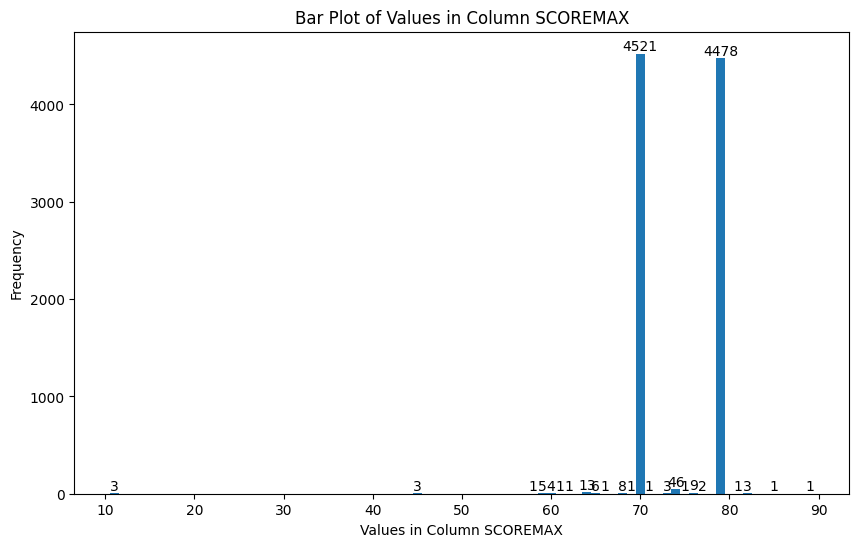

In [885]:
# Count the occurrences of each unique value in column A
value_counts = grouped_sum['SCOREMAX'].value_counts()

plt.figure(figsize=(10, 6))
# Plot the bar plot
plt.bar(value_counts.index, value_counts.values, width=1)

# Add labels and title
plt.xlabel('Values in Column SCOREMAX')
plt.ylabel('Frequency')
plt.title('Bar Plot of Values in Column SCOREMAX')

for i, count in enumerate(value_counts.values):
    plt.text(value_counts.index[i], count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


In [886]:
table_data = pd.DataFrame({'ScoreMax': value_counts.index, 'Count': value_counts.values})

table_data

,ScoreMax,Count
0,70,4521
1,79,4478
2,74,46
3,64,13
4,76,9
5,68,8
6,65,6
7,59,5
8,60,4
9,73,3


In [887]:
RAND36_qs = grouped_sum.copy()
RAND36_qs = RAND36_qs.drop(columns=['QSSTRESN','SCOREMAX'])
RAND36_qs

,USUBJID,QSDY,QSNEWCAT,QSPERC
0,MSOAC/0019,1.0,MENTAL,0.657143
1,MSOAC/0019,1.0,PHYSICAL,0.708861
2,MSOAC/0019,360.0,MENTAL,0.685714
3,MSOAC/0019,360.0,PHYSICAL,0.734177
4,MSOAC/0019,724.0,MENTAL,0.685714
...,...,...,...,...
9109,MSOAC/9998,358.0,PHYSICAL,0.696203
9110,MSOAC/9998,715.0,MENTAL,0.700000
9111,MSOAC/9998,715.0,PHYSICAL,0.607595
9112,MSOAC/9998,1072.0,MENTAL,0.585714


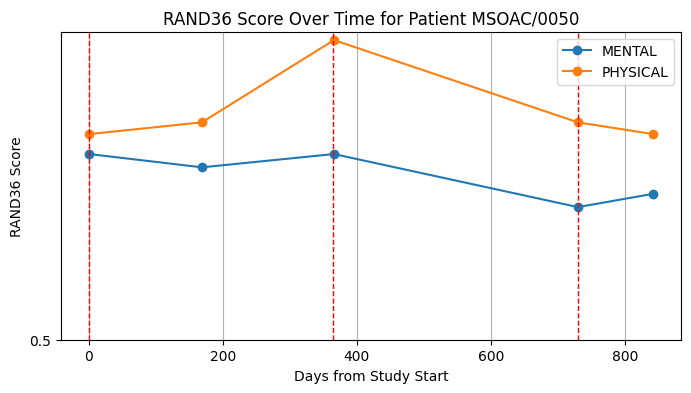

In [888]:
patient_id = 'MSOAC/0050'
#patient_id = 'MSOAC/9998' 

# List of unique QSTEST values for color-coding
unique_qsnewcat_values = RAND36_qs['QSNEWCAT'].unique()

# Filter the DataFrame for the specific patient
patient_data = RAND36_qs[RAND36_qs['USUBJID'] == patient_id]

# Plot the score over time
plt.figure(figsize=(8, 4))
for qsnewcat_value in unique_qsnewcat_values:
    subset_data = patient_data[patient_data['QSNEWCAT'] == qsnewcat_value]
    plt.plot(subset_data['QSDY'], subset_data['QSPERC'], marker='o', label=f'{qsnewcat_value}')
plt.title(f'RAND36 Score Over Time for Patient {patient_id}')
plt.xlabel('Days from Study Start')
plt.ylabel('RAND36 Score')
plt.grid(True)
plt.legend()

# Set y-axis ticks in increments of 0.5, starting from the minimal value
min_value = patient_data['QSPERC'].min()
max_value = patient_data['QSPERC'].max()
plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [1, 365, 730]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)
plt.show()

In [889]:
# Create subsets for different time periods
before_study_start = RAND36_qs[RAND36_qs['QSDY'] <= 1]
#one_year_after_start = RAND36_qs[(RAND36_qs['QSDY'] >= 1) & (RAND36_qs['QSDY'] <= 365)]
two_years_after_start = RAND36_qs[(RAND36_qs['QSDY'] > 1) & (RAND36_qs['QSDY'] <= 730)]
more_than_two_years_after_start = RAND36_qs[RAND36_qs['QSDY'] > 730]

# Function to count observations for a given subset
def count_observations(subset, title):
    outcome_measure_counts = subset.groupby(['QSNEWCAT', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('QSNEWCAT')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')


Before Study Start


,count,mean,std,min,25%,50%,75%,max
QSNEWCAT,,,,,,,,
MENTAL,1052.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
PHYSICAL,1052.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [890]:
#count_observations(one_year_after_start, '1 Year After Study Start')

In [891]:
count_observations(two_years_after_start, '2 Years After Study Start')


2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSNEWCAT,,,,,,,,
MENTAL,1033.0,2.618587,0.864751,1.0,2.0,3.0,3.0,5.0
PHYSICAL,1033.0,2.618587,0.864751,1.0,2.0,3.0,3.0,5.0


In [892]:
count_observations(more_than_two_years_after_start, 'More Than 2 Years After Study Start')


More Than 2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSNEWCAT,,,,,,,,
MENTAL,626.0,1.277955,0.492562,1.0,1.0,1.0,2.0,3.0
PHYSICAL,626.0,1.277955,0.492562,1.0,1.0,1.0,2.0,3.0


In [893]:
RAND36_qs = RAND36_qs.copy()  # Create a copy to avoid the warning


conditions = [
    (RAND36_qs['QSDY'] <= 1),
    ((RAND36_qs['QSDY'] > 1) & (RAND36_qs['QSDY'] <= 730)),
    #((RAND36_qs['QSDY'] > 365) & (RAND36_qs['QSDY'] <= 730)),
    ((RAND36_qs['QSDY'] > 730))
]

# Define corresponding values for each condition
values = ['before', '2y', 'after_2y'] # , '4y' - if i use this i have 93% missing in the time

# Create the new column "FT_PERIOD"
RAND36_qs['QS_PERIOD'] = np.select(conditions, values, default='NaN')
RAND36_qs = RAND36_qs.dropna(subset=['QSDY']) #Drop observations for which we don't have time of test
RAND36_qs

,USUBJID,QSDY,QSNEWCAT,QSPERC,QS_PERIOD
0,MSOAC/0019,1.0,MENTAL,0.657143,before
1,MSOAC/0019,1.0,PHYSICAL,0.708861,before
2,MSOAC/0019,360.0,MENTAL,0.685714,2y
3,MSOAC/0019,360.0,PHYSICAL,0.734177,2y
4,MSOAC/0019,724.0,MENTAL,0.685714,2y
...,...,...,...,...,...
9109,MSOAC/9998,358.0,PHYSICAL,0.696203,2y
9110,MSOAC/9998,715.0,MENTAL,0.700000,2y
9111,MSOAC/9998,715.0,PHYSICAL,0.607595,2y
9112,MSOAC/9998,1072.0,MENTAL,0.585714,after_2y


In [894]:
# Filtering based on the condition 'QSNEWCAT' == 'MENTAL'
mental_df = RAND36_qs[RAND36_qs['QSNEWCAT'] == 'MENTAL']

# Pivot table for 'MENTAL' category
grouped_mental_df = mental_df.pivot_table(values='QSPERC', index='USUBJID', columns='QS_PERIOD', aggfunc='mean', fill_value=None).reset_index()
grouped_mental_df.columns = ['USUBJID'] + [f"RAND36_M-{period}" for period in grouped_mental_df.columns[1:]]

# Filtering based on the condition 'QSNEWCAT' == 'PHYSICAL'
physical_df = RAND36_qs[RAND36_qs['QSNEWCAT'] == 'PHYSICAL']

# Pivot table for 'PHYSICAL' category
grouped_physical_df = physical_df.pivot_table(values='QSPERC', index='USUBJID', columns='QS_PERIOD', aggfunc='mean', fill_value=None).reset_index()
grouped_physical_df.columns = ['USUBJID'] + [f"RAND36_P-{period}" for period in grouped_physical_df.columns[1:]]

# Merge the new DataFrames with the original DataFrame on 'USUBJID'
result_RAND36 = pd.merge(RAND36_qs[['USUBJID']], grouped_mental_df, on='USUBJID', how='left')
result_RAND36 = pd.merge(result_RAND36, grouped_physical_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient and period
result_RAND36 = result_RAND36.drop_duplicates(subset=['USUBJID'])

# Display the resulting DataFrame
result_RAND36#.head(20)

,USUBJID,RAND36_M-2y,RAND36_M-after_2y,RAND36_M-before,RAND36_P-2y,RAND36_P-after_2y,RAND36_P-before
0,MSOAC/0019,0.685714,0.714286,0.657143,0.740506,0.683544,0.708861
8,MSOAC/0024,0.644118,NaN,0.657143,0.581024,NaN,0.481013
16,MSOAC/0031,0.604762,0.585714,0.671429,0.696203,0.658228,0.683544
26,MSOAC/0041,0.707143,NaN,0.728571,0.525316,NaN,0.506329
32,MSOAC/0050,0.676190,0.657143,0.700000,0.763713,0.721519,0.721519
...,...,...,...,...,...,...,...
9076,MSOAC/9974,0.700000,0.585714,0.685714,0.594937,0.594937,0.632911
9082,MSOAC/9976,0.678571,0.628571,0.685714,0.721519,0.696203,0.797468
9090,MSOAC/9981,0.592857,NaN,0.657143,0.610759,NaN,0.569620
9100,MSOAC/9985,0.707143,NaN,0.714286,0.670886,NaN,0.708861


In [895]:
# Calculate the percentage of missing values for each column
missing_percentage = result_RAND36.isnull().mean() * 100

# Sort columns based on missing percentage in descending order
sorted_columns = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values for each column in result_EDSS (sorted high to low):")
print(sorted_columns)

Percentage of missing values for each column in result_EDSS (sorted high to low):
RAND36_M-after_2y    41.165414
RAND36_P-after_2y    41.165414
RAND36_M-2y           2.913534
RAND36_P-2y           2.913534
RAND36_M-before       1.127820
RAND36_P-before       1.127820
USUBJID               0.000000
dtype: float64


#### SF-12 V2

In [896]:
SF_rows = qs[qs['QSCAT'] == 'SF-12 V2']
SF_rows.head()

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
51921,MSOAC/0030,39,SF121-Would You Say Your Health Is,SF-12 V2,GENERAL HEALTH,GOOD,3,3.0,20.0,DAY 1,1.0,NaN
51924,MSOAC/0030,40,SF121-Health Limit Moderate Activities,SF-12 V2,PHYSICAL FUNCTIONING,"NO, NOT LIMITED AT ALL",3,3.0,20.0,DAY 1,1.0,NaN
51925,MSOAC/0030,41,SF121-Health Limit Climb Several Flights,SF-12 V2,PHYSICAL FUNCTIONING,"YES, LIMITED A LITTLE",2,2.0,20.0,DAY 1,1.0,NaN
51928,MSOAC/0030,42,SF121-Phys Health: Accomplish Less,SF-12 V2,ROLE PHYSICAL,NONE OF THE TIME,5,5.0,20.0,DAY 1,1.0,-P4W
51929,MSOAC/0030,43,SF121-Phys Health: Limit Kind of Work,SF-12 V2,ROLE PHYSICAL,A LITTLE OF THE TIME,4,4.0,20.0,DAY 1,1.0,-P4W


In [897]:
# Count unique values of USUBJID in each dataframe
unique_usubjid_sf = SF_rows['USUBJID'].nunique()
unique_usubjid_rand36 = RAND36_qs['USUBJID'].nunique()

# Overlapping between SF_rows and RAND36_qs
overlap_sf_rand36 = set(SF_rows['USUBJID']).intersection(RAND36_qs['USUBJID'])

print("Number of unique USUBJID in SF_rows:", unique_usubjid_sf)
print("Number of unique USUBJID in RAND36_qs:", unique_usubjid_rand36)
print("Number of overlapping USUBJID between SF_rows and RAND36_qs:", len(overlap_sf_rand36))

Number of unique USUBJID in SF_rows: 500
Number of unique USUBJID in RAND36_qs: 1064
Number of overlapping USUBJID between SF_rows and RAND36_qs: 0


In [898]:
count = SF_rows.copy()

# Group by columns A and B, then count the occurrences of each unique pair
count['COUNT'] = count.groupby(['USUBJID', 'QSDY'])['USUBJID'].transform('count')

# Display the updated DataFrame
count = count[['USUBJID','QSDY', 'COUNT']].drop_duplicates()
count

,USUBJID,QSDY,COUNT
51921,MSOAC/0030,1.0,12
355014,MSOAC/0030,85.0,12
389085,MSOAC/0030,171.0,12
51963,MSOAC/0046,1.0,12
355063,MSOAC/0046,83.0,12
...,...,...,...
421304,MSOAC/9980,169.0,12
429699,MSOAC/9980,337.0,12
72712,MSOAC/9986,1.0,12
377726,MSOAC/9986,85.0,12


In [899]:
count[count['COUNT'] != 12]

,USUBJID,QSDY,COUNT
356255,MSOAC/0463,90.0,8
399435,MSOAC/3299,169.0,8
405546,MSOAC/5075,170.0,11
67675,MSOAC/7523,1.0,7
374523,MSOAC/8534,85.0,11


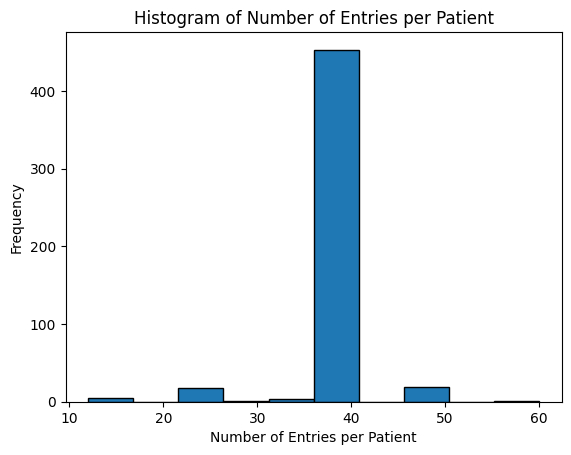

In [900]:
# Grouping by 'USUBJID' and counting the number of entries for each patient
patient_entries_count = SF_rows.groupby('USUBJID').size()

# Creating a histogram
plt.hist(patient_entries_count, bins='auto', edgecolor='black')
plt.xlabel('Number of Entries per Patient')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Entries per Patient')
plt.show()

In [901]:
patient_entries_count = SF_rows.groupby('USUBJID').size().reset_index(name='Number_of_Entries')

# Grouping by 'Number_of_Entries' and counting the number of patients for each count of entries
entries_distribution = patient_entries_count.groupby('Number_of_Entries').size().reset_index(name='Number_of_Patients')
entries_distribution

,Number_of_Entries,Number_of_Patients
0,12,5
1,23,1
2,24,17
3,31,1
4,32,2
5,35,1
6,36,453
7,48,19
8,60,1


In [902]:
SF_rows['QSDY'].describe()

count    17901.000000
mean        88.037540
std         75.181741
min         -7.000000
25%          1.000000
50%         85.000000
75%        169.000000
max        427.000000
Name: QSDY, dtype: float64

In [903]:
# Check the number of unique OEDY values
unique_qsdy_values = SF_rows['QSDY'].nunique()
print("Number of unique QSDY values when QSCAT is 'SF-12 V2':", unique_qsdy_values)

Number of unique QSDY values when QSCAT is 'SF-12 V2': 64


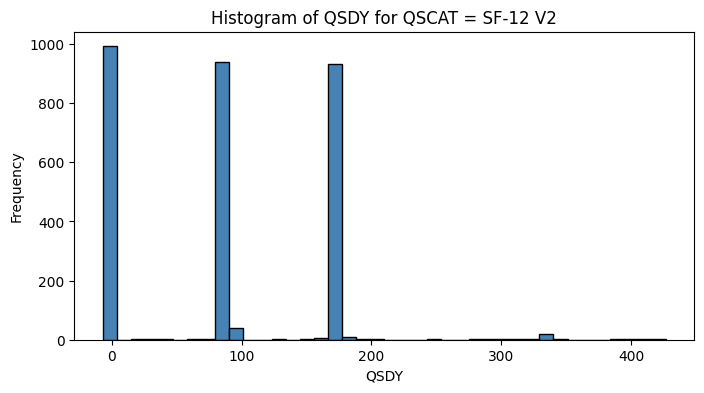

In [949]:
plt.figure(figsize=(8, 4))
plt.hist(SF_rows['QSDY'], bins=40, color='steelblue', edgecolor='black')
plt.xlabel('QSDY')
plt.ylabel('Frequency')
plt.title('Histogram of QSDY for QSCAT = SF-12 V2')
plt.show()

**based on this: 3 time bins where the spikes are?**

see also below
- time bin 1: before until day 16
- time bin 2: after day 16 until day 101
- time bin 3: after day 101

In [905]:
unique_visits = SF_rows['VISIT'].unique()

# Print or use unique_visits as needed
print(unique_visits)

['DAY 1' 'WEEK 12' 'WEEK 24' 'EARLY WITHDRAWAL' 'MES VISIT 3' 'WEEK 48']


In [906]:
count_week_48 = len(SF_rows[SF_rows['VISIT'] == 'WEEK 48'])
print(count_week_48)

60


too little to put in a separate time bin --> 3 time bins

In [907]:
max_qsdy_baseline = SF_rows.loc[SF_rows['VISIT'] == 'DAY 1', 'QSDY'].max()
print("Max QSDY for VISIT=DAY 1:", max_qsdy_baseline)

Max QSDY for VISIT=DAY 1: 16.0


In [908]:
max_qsdy_week12 = SF_rows.loc[SF_rows['VISIT'] == 'WEEK 12', 'QSDY'].max()
print("Max QSDY for VISIT=WEEK 12:", max_qsdy_week12)

Max QSDY for VISIT=WEEK 12: 101.0


In [909]:
max_qsdy_week24 = SF_rows.loc[SF_rows['VISIT'] == 'WEEK 24', 'QSDY'].max()
print("Max QSDY for VISIT=WEEK 24:", max_qsdy_week24)

Max QSDY for VISIT=WEEK 24: 204.0


**CHECK QSORRES FOR INTERPRETATION/MEAN WHAT IS GOOD BAD ETC BUT QSSTRESN USE IN CALCULATIONS**

In [910]:
columns_to_drop = ['QSCAT', 'QSORRES', 'VISITNUM', 'QSEVLINT']
SF_rows.drop(columns=columns_to_drop, inplace=True)

SF_rows.head(30)

C:\Users\anaso\AppData\Local\Temp\ipykernel_20944\2608131137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF_rows.drop(columns=columns_to_drop, inplace=True)


,USUBJID,QSSEQ,QSTEST,QSSCAT,QSSTRESC,QSSTRESN,VISIT,QSDY
51921,MSOAC/0030,39,SF121-Would You Say Your Health Is,GENERAL HEALTH,3,3.0,DAY 1,1.0
51924,MSOAC/0030,40,SF121-Health Limit Moderate Activities,PHYSICAL FUNCTIONING,3,3.0,DAY 1,1.0
51925,MSOAC/0030,41,SF121-Health Limit Climb Several Flights,PHYSICAL FUNCTIONING,2,2.0,DAY 1,1.0
51928,MSOAC/0030,42,SF121-Phys Health: Accomplish Less,ROLE PHYSICAL,5,5.0,DAY 1,1.0
51929,MSOAC/0030,43,SF121-Phys Health: Limit Kind of Work,ROLE PHYSICAL,4,4.0,DAY 1,1.0
51926,MSOAC/0030,44,SF121-Emotional Problem: Accomplish Less,ROLE EMOTIONAL,5,5.0,DAY 1,1.0
51927,MSOAC/0030,45,SF121-Emotional Problem: Less Careful,ROLE EMOTIONAL,5,5.0,DAY 1,1.0
51920,MSOAC/0030,46,SF121-Did Pain Interfere With Your Work,BODILY PAIN,1,1.0,DAY 1,1.0
51922,MSOAC/0030,47,SF121-Have You Felt Calm and Peaceful,MENTAL HEALTH,1,1.0,DAY 1,1.0
51931,MSOAC/0030,48,SF121-Did You Have a Lot of Energy,VITALITY,2,2.0,DAY 1,1.0


In [911]:
pivot_table = SF_rows.pivot_table(index='QSTEST', columns='QSSTRESN', aggfunc='size', fill_value=0)
pivot_table

QSSTRESN,1.0,2.0,3.0,4.0,5.0
QSTEST,,,,,
SF121-Amt Time Interfere Social Activity,53,146,356,337,599
SF121-Did Pain Interfere With Your Work,688,345,302,130,27
SF121-Did You Have a Lot of Energy,150,474,464,312,91
SF121-Emotional Problem: Accomplish Less,34,137,385,384,552
SF121-Emotional Problem: Less Careful,28,100,367,423,574
SF121-Have Felt Downhearted/Depressed,43,169,428,420,431
SF121-Have You Felt Calm and Peaceful,214,663,389,190,35
SF121-Health Limit Climb Several Flights,273,643,577,0,0
SF121-Health Limit Moderate Activities,184,635,674,0,0


In [912]:
# QSTEST
qstest_counts_sf = SF_rows['QSTEST'].value_counts().reset_index()
qstest_counts_sf.columns = ['QSTEST', 'Count']
total_count = qstest_counts_sf['Count'].sum()
qstest_counts_sf['Percentage'] = (qstest_counts_sf['Count'] / total_count) * 100
qstest_counts_sf

,QSTEST,Count,Percentage
0,SF121-Would You Say Your Health Is,1493,8.340316
1,SF121-Health Limit Moderate Activities,1493,8.340316
2,SF121-Health Limit Climb Several Flights,1493,8.340316
3,SF121-Phys Health: Accomplish Less,1492,8.334730
4,SF121-Emotional Problem: Accomplish Less,1492,8.334730
5,SF121-Emotional Problem: Less Careful,1492,8.334730
6,SF121-Did Pain Interfere With Your Work,1492,8.334730
7,SF121-Have You Felt Calm and Peaceful,1491,8.329144
8,SF121-Did You Have a Lot of Energy,1491,8.329144
9,SF121-Have Felt Downhearted/Depressed,1491,8.329144


In [913]:
# QSSCAT
qsscat_counts_sf = SF_rows['QSSCAT'].value_counts().reset_index()
qsscat_counts_sf.columns = ['QSSCAT', 'Count']
total_count = qsscat_counts_sf['Count'].sum()
qsscat_counts_sf['Percentage'] = (qsscat_counts_sf['Count'] / total_count) * 100
qsscat_counts_sf

,QSSCAT,Count,Percentage
0,PHYSICAL FUNCTIONING,2986,16.680632
1,ROLE EMOTIONAL,2984,16.669460
2,ROLE PHYSICAL,2982,16.658287
3,MENTAL HEALTH,2982,16.658287
4,GENERAL HEALTH,1493,8.340316
5,BODILY PAIN,1492,8.334730
6,VITALITY,1491,8.329144
7,SOCIAL FUNCTIONING,1491,8.329144


See scale for each category of questionnaire

In [914]:
# PHYSICAL FUNCTIONING
phys_funct = SF_rows[SF_rows['QSSCAT'] == 'PHYSICAL FUNCTIONING']

qsstresn_counts_qs = phys_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,2.0,1278,42.799732
1,3.0,1251,41.895512
2,1.0,457,15.304756


In [915]:
phys_funct_per_qsteet = phys_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_funct_per_qsteet = phys_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_funct_per_qsteet

,QSTEST,QSSTRESN,Count
2,SF121-Health Limit Climb Several Flights,1.0,273
0,SF121-Health Limit Climb Several Flights,2.0,643
1,SF121-Health Limit Climb Several Flights,3.0,577
5,SF121-Health Limit Moderate Activities,1.0,184
4,SF121-Health Limit Moderate Activities,2.0,635
3,SF121-Health Limit Moderate Activities,3.0,674


In [916]:
# ROLE EMOTIONAL
emotion_prob = SF_rows[SF_rows['QSSCAT'] == 'ROLE EMOTIONAL']

qsstresn_counts_qs = emotion_prob['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,5.0,1126,37.734584
1,4.0,807,27.044236
2,3.0,752,25.201072
3,2.0,237,7.942359
4,1.0,62,2.077748


In [917]:
emotion_prob_per_qsteet = emotion_prob.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
emotion_prob_per_qsteet = emotion_prob_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
emotion_prob_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Emotional Problem: Accomplish Less,1.0,34
3,SF121-Emotional Problem: Accomplish Less,2.0,137
1,SF121-Emotional Problem: Accomplish Less,3.0,385
2,SF121-Emotional Problem: Accomplish Less,4.0,384
0,SF121-Emotional Problem: Accomplish Less,5.0,552
9,SF121-Emotional Problem: Less Careful,1.0,28
8,SF121-Emotional Problem: Less Careful,2.0,100
7,SF121-Emotional Problem: Less Careful,3.0,367
6,SF121-Emotional Problem: Less Careful,4.0,423
5,SF121-Emotional Problem: Less Careful,5.0,574


In [918]:
# ROLE PHYSICAL
phys_prob = SF_rows[SF_rows['QSSCAT'] == 'ROLE PHYSICAL']

qsstresn_counts_qs = phys_prob['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,916,30.717639
1,5.0,857,28.739101
2,4.0,719,24.111335
3,2.0,365,12.240107
4,1.0,125,4.191818


In [919]:
phys_prob_per_qsteet = phys_prob.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_prob_per_qsteet = phys_prob_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_prob_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Phys Health: Accomplish Less,1.0,63
3,SF121-Phys Health: Accomplish Less,2.0,196
0,SF121-Phys Health: Accomplish Less,3.0,475
2,SF121-Phys Health: Accomplish Less,4.0,364
1,SF121-Phys Health: Accomplish Less,5.0,394
9,SF121-Phys Health: Limit Kind of Work,1.0,62
8,SF121-Phys Health: Limit Kind of Work,2.0,169
6,SF121-Phys Health: Limit Kind of Work,3.0,441
7,SF121-Phys Health: Limit Kind of Work,4.0,355
5,SF121-Phys Health: Limit Kind of Work,5.0,463


In [920]:
# MENTAL HEALTH
mental = SF_rows[SF_rows['QSSCAT'] == 'MENTAL HEALTH']

qsstresn_counts_qs = mental['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,2.0,832,27.900738
1,3.0,817,27.397720
2,4.0,610,20.456070
3,5.0,466,15.627096
4,1.0,257,8.618377


In [921]:
mental_per_qsteet = mental.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
mental_per_qsteet = mental_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
mental_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Have Felt Downhearted/Depressed,1.0,43
3,SF121-Have Felt Downhearted/Depressed,2.0,169
1,SF121-Have Felt Downhearted/Depressed,3.0,428
2,SF121-Have Felt Downhearted/Depressed,4.0,420
0,SF121-Have Felt Downhearted/Depressed,5.0,431
7,SF121-Have You Felt Calm and Peaceful,1.0,214
5,SF121-Have You Felt Calm and Peaceful,2.0,663
6,SF121-Have You Felt Calm and Peaceful,3.0,389
8,SF121-Have You Felt Calm and Peaceful,4.0,190
9,SF121-Have You Felt Calm and Peaceful,5.0,35


In [922]:
# GENERAL HEALTH
gen_health = SF_rows[SF_rows['QSSCAT'] == 'GENERAL HEALTH']

qsstresn_counts_qs = gen_health['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,614,41.125251
1,4.0,472,31.614200
2,2.0,258,17.280643
3,5.0,93,6.229069
4,1.0,56,3.750837


In [923]:
gen_health_per_qsteet = gen_health.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
gen_health_per_qsteet = gen_health_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
gen_health_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Would You Say Your Health Is,1.0,56
2,SF121-Would You Say Your Health Is,2.0,258
0,SF121-Would You Say Your Health Is,3.0,614
1,SF121-Would You Say Your Health Is,4.0,472
3,SF121-Would You Say Your Health Is,5.0,93


In [924]:
# BODILY PAIN
pain = SF_rows[SF_rows['QSSCAT'] == 'BODILY PAIN']

qsstresn_counts_qs = pain['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,688,46.112601
1,2.0,345,23.123324
2,3.0,302,20.241287
3,4.0,130,8.713137
4,5.0,27,1.809651


In [925]:
pain_per_qsteet = pain.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
pain_per_qsteet = pain_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
pain_per_qsteet

,QSTEST,QSSTRESN,Count
0,SF121-Did Pain Interfere With Your Work,1.0,688
1,SF121-Did Pain Interfere With Your Work,2.0,345
2,SF121-Did Pain Interfere With Your Work,3.0,302
3,SF121-Did Pain Interfere With Your Work,4.0,130
4,SF121-Did Pain Interfere With Your Work,5.0,27


In [926]:
# VITALITY
energy_fatigue = SF_rows[SF_rows['QSSCAT'] == 'VITALITY']

qsstresn_counts_qs = energy_fatigue['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,2.0,474,31.790744
1,3.0,464,31.120054
2,4.0,312,20.925553
3,1.0,150,10.060362
4,5.0,91,6.103286


In [927]:
energy_fatigue_per_qsteet = energy_fatigue.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
energy_fatigue_per_qsteet = energy_fatigue_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
energy_fatigue_per_qsteet

,QSTEST,QSSTRESN,Count
3,SF121-Did You Have a Lot of Energy,1.0,150
0,SF121-Did You Have a Lot of Energy,2.0,474
1,SF121-Did You Have a Lot of Energy,3.0,464
2,SF121-Did You Have a Lot of Energy,4.0,312
4,SF121-Did You Have a Lot of Energy,5.0,91


In [928]:
# SOCIAL FUNCTIONING
social_funct = SF_rows[SF_rows['QSSCAT'] == 'SOCIAL FUNCTIONING']

qsstresn_counts_qs = social_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,5.0,599,40.174380
1,3.0,356,23.876593
2,4.0,337,22.602280
3,2.0,146,9.792086
4,1.0,53,3.554661


In [929]:
social_funct_per_qsteet = social_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
social_funct_per_qsteet = social_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
social_funct_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Amt Time Interfere Social Activity,1.0,53
3,SF121-Amt Time Interfere Social Activity,2.0,146
1,SF121-Amt Time Interfere Social Activity,3.0,356
2,SF121-Amt Time Interfere Social Activity,4.0,337
0,SF121-Amt Time Interfere Social Activity,5.0,599


*Note:* all questions per QSSCAT use the SAME likert-scale of 1-5 (except for PHYSICAL FUNCTIONING)

the scores are combined and transformed to generate two summary measures: *the Physical Component Summary (PCS) and the Mental Component Summary (MCS)*. These summary measures provide an overview of a person's physical and mental health status, respectively.

Physical:
- general health (1 question)
- physical functioning (2 questions)
- role physical (2 questions)
- bodily pain (1 question)

Mental:
- role emotional (2 questions)
- mental health (2 questions)
- vitality (1 question)
- social functioning (1 question)

In [930]:
unique_values = SF_rows['QSSCAT'].unique()
unique_values

array(['GENERAL HEALTH', 'PHYSICAL FUNCTIONING', 'ROLE PHYSICAL',
       'ROLE EMOTIONAL', 'BODILY PAIN', 'MENTAL HEALTH', 'VITALITY',
       'SOCIAL FUNCTIONING'], dtype=object)

In [931]:
def assign_value(row):
    if row['QSSCAT'] in ['GENERAL HEALTH', 'PHYSICAL FUNCTIONING', 'ROLE PHYSICAL', 'BODILY PAIN']:
        return 'PHYSICAL'
    else:
        return 'MENTAL'

# Apply the function row-wise to assign values to desired column 
SF_rows['QSTEST'] = SF_rows.apply(assign_value, axis=1)

# Display the DataFrame
SF_rows

C:\Users\anaso\AppData\Local\Temp\ipykernel_20944\189760803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF_rows['QSTEST'] = SF_rows.apply(assign_value, axis=1)


,USUBJID,QSSEQ,QSTEST,QSSCAT,QSSTRESC,QSSTRESN,VISIT,QSDY
51921,MSOAC/0030,39,PHYSICAL,GENERAL HEALTH,3,3.0,DAY 1,1.0
51924,MSOAC/0030,40,PHYSICAL,PHYSICAL FUNCTIONING,3,3.0,DAY 1,1.0
51925,MSOAC/0030,41,PHYSICAL,PHYSICAL FUNCTIONING,2,2.0,DAY 1,1.0
51928,MSOAC/0030,42,PHYSICAL,ROLE PHYSICAL,5,5.0,DAY 1,1.0
51929,MSOAC/0030,43,PHYSICAL,ROLE PHYSICAL,4,4.0,DAY 1,1.0
...,...,...,...,...,...,...,...,...
421345,MSOAC/9986,130,PHYSICAL,BODILY PAIN,2,2.0,WEEK 24,177.0
421347,MSOAC/9986,131,MENTAL,MENTAL HEALTH,3,3.0,WEEK 24,177.0
421356,MSOAC/9986,132,MENTAL,VITALITY,5,5.0,WEEK 24,177.0
421348,MSOAC/9986,133,MENTAL,MENTAL HEALTH,5,5.0,WEEK 24,177.0


In [932]:
def set_scoremax(row):
    return 3 if row['QSSCAT'] == 'PHYSICAL FUNCTIONING' else 5

# Apply the function row-wise to set the values in desired column 
SF_rows['SCOREMAX'] = SF_rows.apply(set_scoremax, axis=1)
SF_rows

C:\Users\anaso\AppData\Local\Temp\ipykernel_20944\3012306523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF_rows['SCOREMAX'] = SF_rows.apply(set_scoremax, axis=1)


,USUBJID,QSSEQ,QSTEST,QSSCAT,QSSTRESC,QSSTRESN,VISIT,QSDY,SCOREMAX
51921,MSOAC/0030,39,PHYSICAL,GENERAL HEALTH,3,3.0,DAY 1,1.0,5
51924,MSOAC/0030,40,PHYSICAL,PHYSICAL FUNCTIONING,3,3.0,DAY 1,1.0,3
51925,MSOAC/0030,41,PHYSICAL,PHYSICAL FUNCTIONING,2,2.0,DAY 1,1.0,3
51928,MSOAC/0030,42,PHYSICAL,ROLE PHYSICAL,5,5.0,DAY 1,1.0,5
51929,MSOAC/0030,43,PHYSICAL,ROLE PHYSICAL,4,4.0,DAY 1,1.0,5
...,...,...,...,...,...,...,...,...,...
421345,MSOAC/9986,130,PHYSICAL,BODILY PAIN,2,2.0,WEEK 24,177.0,5
421347,MSOAC/9986,131,MENTAL,MENTAL HEALTH,3,3.0,WEEK 24,177.0,5
421356,MSOAC/9986,132,MENTAL,VITALITY,5,5.0,WEEK 24,177.0,5
421348,MSOAC/9986,133,MENTAL,MENTAL HEALTH,5,5.0,WEEK 24,177.0,5


For PHYSICAL: total score of all 4 tests is 4 * 5 + 2 * 3 = 20 + 6 = 26

For MENTAL: total score of all 4 tests is 6 * 5 = 30

In [933]:
grouped_sum = SF_rows.groupby(['USUBJID', 'QSDY', 'QSTEST']).agg({'QSSTRESN': 'sum', 'SCOREMAX': 'sum'}).reset_index()
grouped_sum

,USUBJID,QSDY,QSTEST,QSSTRESN,SCOREMAX
0,MSOAC/0030,1.0,MENTAL,22.0,30
1,MSOAC/0030,1.0,PHYSICAL,18.0,26
2,MSOAC/0030,85.0,MENTAL,19.0,30
3,MSOAC/0030,85.0,PHYSICAL,16.0,26
4,MSOAC/0030,171.0,MENTAL,23.0,30
...,...,...,...,...,...
2981,MSOAC/9986,1.0,PHYSICAL,15.0,26
2982,MSOAC/9986,85.0,MENTAL,24.0,30
2983,MSOAC/9986,85.0,PHYSICAL,15.0,26
2984,MSOAC/9986,177.0,MENTAL,28.0,30


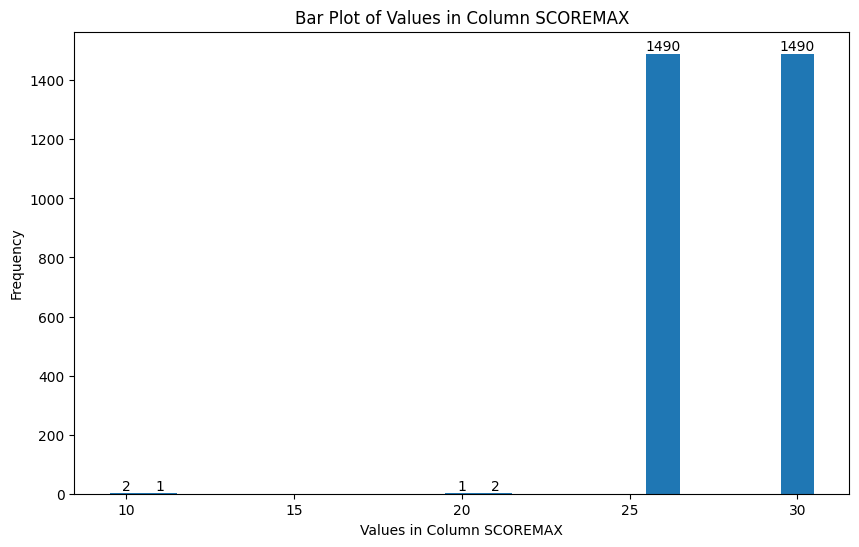

In [934]:
# Count the occurrences of each unique value in column A
value_counts = grouped_sum['SCOREMAX'].value_counts()

plt.figure(figsize=(10, 6))
# Plot the bar plot
plt.bar(value_counts.index, value_counts.values, width=1)

# Add labels and title
plt.xlabel('Values in Column SCOREMAX')
plt.ylabel('Frequency')
plt.title('Bar Plot of Values in Column SCOREMAX')

for i, count in enumerate(value_counts.values):
    plt.text(value_counts.index[i], count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

almost exclusively 26 and 30, as expected

In [935]:
unique_values = grouped_sum['SCOREMAX'].unique()

# Print the unique values
print(unique_values)

[30 26 10 21 20 11]


Values 10, 11, 20 and 21 might indicate that for a certain patient at a certain time, not all questions were answered

In [936]:
grouped_sum['QSPERC'] = grouped_sum['QSSTRESN'] / grouped_sum['SCOREMAX']
grouped_sum

,USUBJID,QSDY,QSTEST,QSSTRESN,SCOREMAX,QSPERC
0,MSOAC/0030,1.0,MENTAL,22.0,30,0.733333
1,MSOAC/0030,1.0,PHYSICAL,18.0,26,0.692308
2,MSOAC/0030,85.0,MENTAL,19.0,30,0.633333
3,MSOAC/0030,85.0,PHYSICAL,16.0,26,0.615385
4,MSOAC/0030,171.0,MENTAL,23.0,30,0.766667
...,...,...,...,...,...,...
2981,MSOAC/9986,1.0,PHYSICAL,15.0,26,0.576923
2982,MSOAC/9986,85.0,MENTAL,24.0,30,0.800000
2983,MSOAC/9986,85.0,PHYSICAL,15.0,26,0.576923
2984,MSOAC/9986,177.0,MENTAL,28.0,30,0.933333


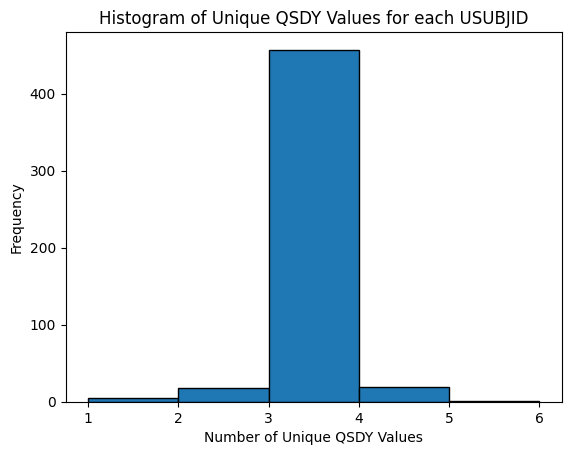

In [937]:
SF_rows = grouped_sum

# Make a histogram of the number of unique QSDY values per patient
hist_data = SF_rows.groupby('USUBJID')['QSDY'].nunique()

# Plotting the histogram
plt.hist(hist_data, bins=range(1, hist_data.max() + 2), edgecolor='black')
plt.xlabel('Number of Unique QSDY Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique QSDY Values for each USUBJID')
plt.show()

There's only between 1 and 5 measurements of the SF12 questionnaire for each patient (usually 3) - **maybe then there's no point in even making a split in time bins? the same goes for the others RAND36 and KFSS and BDI-II**

In [938]:
SF_rows = SF_rows.drop(columns=['QSSTRESN','SCOREMAX'])
SF_rows

,USUBJID,QSDY,QSTEST,QSPERC
0,MSOAC/0030,1.0,MENTAL,0.733333
1,MSOAC/0030,1.0,PHYSICAL,0.692308
2,MSOAC/0030,85.0,MENTAL,0.633333
3,MSOAC/0030,85.0,PHYSICAL,0.615385
4,MSOAC/0030,171.0,MENTAL,0.766667
...,...,...,...,...
2981,MSOAC/9986,1.0,PHYSICAL,0.576923
2982,MSOAC/9986,85.0,MENTAL,0.800000
2983,MSOAC/9986,85.0,PHYSICAL,0.576923
2984,MSOAC/9986,177.0,MENTAL,0.933333


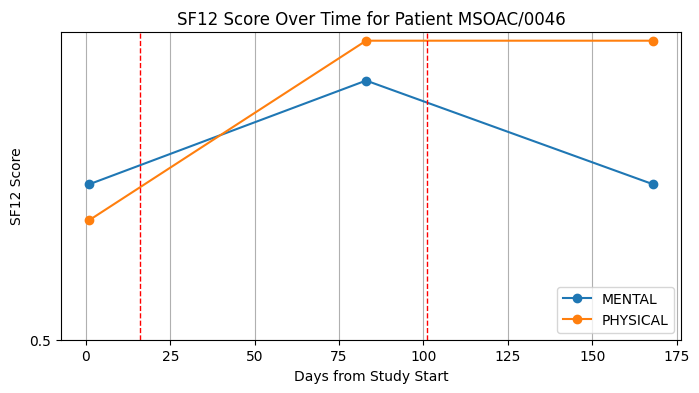

In [939]:
patient_id = 'MSOAC/0046'
#patient_id = 'MSOAC/9986' 

# List of unique QSTEST values for color-coding
unique_qstest_values = SF_rows['QSTEST'].unique()

# Filter the DataFrame for the specific patient
patient_data = SF_rows[SF_rows['USUBJID'] == patient_id]

# Plot the score over time
plt.figure(figsize=(8, 4))
for qstest_value in unique_qstest_values:
    subset_data = patient_data[patient_data['QSTEST'] == qstest_value]
    plt.plot(subset_data['QSDY'], subset_data['QSPERC'], marker='o', label=f'{qstest_value}')
plt.title(f'SF12 Score Over Time for Patient {patient_id}')
plt.xlabel('Days from Study Start')
plt.ylabel('SF12 Score')
plt.grid(True)
plt.legend()

# Set y-axis ticks in increments of 0.5, starting from the minimal value
min_value = patient_data['QSPERC'].min()
max_value = patient_data['QSPERC'].max()
plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [max_qsdy_baseline, max_qsdy_week12]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)
plt.show()

In [940]:
# Create subsets for different time periods
before_study_start = SF_rows[SF_rows['QSDY'] <= max_qsdy_baseline]
week_12 = SF_rows[(SF_rows['QSDY'] > max_qsdy_baseline) & (SF_rows['QSDY'] <= max_qsdy_week12)]
week_24 = SF_rows[SF_rows['QSDY'] > max_qsdy_week12]

# Function to count observations for a given subset
def count_observations(subset, title):
    outcome_measure_counts = subset.groupby(['QSTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('QSTEST')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Baseline')


Baseline


,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
MENTAL,498.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
PHYSICAL,498.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [941]:
count_observations(week_12, 'Week 12')


Week 12


,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
MENTAL,494.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
PHYSICAL,494.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [942]:
count_observations(week_24, 'Week 24')


Week 24


,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
MENTAL,480.0,1.04375,0.214706,1.0,1.0,1.0,1.0,3.0
PHYSICAL,480.0,1.04375,0.214706,1.0,1.0,1.0,1.0,3.0


In [943]:
SF_rows = SF_rows.copy()  # Create a copy to avoid the warning

conditions = [
    (SF_rows['QSDY'] <= max_qsdy_baseline),
    ((SF_rows['QSDY'] > max_qsdy_baseline) & (SF_rows['QSDY'] <= max_qsdy_week12)),
    (SF_rows['QSDY'] > max_qsdy_week12)
]

# Define corresponding values for each condition
values = ['before', 'wk12', 'wk24'] 

# Create the new column "FT_PERIOD"
SF_rows['QS_PERIOD'] = np.select(conditions, values, default='NaN')
SF_rows = SF_rows.dropna(subset=['QSDY']) #Drop observations for which we don't have time of test
SF_rows

,USUBJID,QSDY,QSTEST,QSPERC,QS_PERIOD
0,MSOAC/0030,1.0,MENTAL,0.733333,before
1,MSOAC/0030,1.0,PHYSICAL,0.692308,before
2,MSOAC/0030,85.0,MENTAL,0.633333,wk12
3,MSOAC/0030,85.0,PHYSICAL,0.615385,wk12
4,MSOAC/0030,171.0,MENTAL,0.766667,wk24
...,...,...,...,...,...
2981,MSOAC/9986,1.0,PHYSICAL,0.576923,before
2982,MSOAC/9986,85.0,MENTAL,0.800000,wk12
2983,MSOAC/9986,85.0,PHYSICAL,0.576923,wk12
2984,MSOAC/9986,177.0,MENTAL,0.933333,wk24


In [944]:
# Filtering based on the condition 'QSTEST' == 'MENTAL'
mental_df = SF_rows[SF_rows['QSTEST'] == 'MENTAL']

# Pivot table for 'MENTAL' category
grouped_mental_df = mental_df.pivot_table(values='QSPERC', index='USUBJID', columns='QS_PERIOD', aggfunc='median', fill_value=None).reset_index()
grouped_mental_df.columns = ['USUBJID'] + [f"SF12_M-{period}" for period in grouped_mental_df.columns[1:]]

# Filtering based on the condition 'QSTEST' == 'PHYSICAL'
physical_df = SF_rows[SF_rows['QSTEST'] == 'PHYSICAL']

# Pivot table for 'PHYSICAL' category
grouped_physical_df = physical_df.pivot_table(values='QSPERC', index='USUBJID', columns='QS_PERIOD', aggfunc='median', fill_value=None).reset_index()
grouped_physical_df.columns = ['USUBJID'] + [f"SF12_P-{period}" for period in grouped_physical_df.columns[1:]]

# Merge the new DataFrames with the original DataFrame on 'USUBJID'
result_SF = pd.merge(SF_rows[['USUBJID']], grouped_mental_df, on='USUBJID', how='left')
result_SF = pd.merge(result_SF, grouped_physical_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient and period
result_SF = result_SF.drop_duplicates(subset=['USUBJID'])

# Display the resulting DataFrame
result_SF

,USUBJID,SF12_M-before,SF12_M-wk12,SF12_M-wk24,SF12_P-before,SF12_P-wk12,SF12_P-wk24
0,MSOAC/0030,0.733333,0.633333,0.766667,0.692308,0.615385,0.615385
6,MSOAC/0046,0.600000,0.666667,0.600000,0.576923,0.692308,0.692308
12,MSOAC/0060,0.566667,0.633333,0.633333,0.500000,0.538462,0.538462
18,MSOAC/0063,0.533333,0.466667,NaN,0.615385,0.692308,NaN
22,MSOAC/0065,0.733333,0.733333,0.733333,0.730769,0.730769,0.730769
...,...,...,...,...,...,...,...
2952,MSOAC/9900,0.766667,0.766667,0.766667,0.576923,0.500000,0.615385
2958,MSOAC/9952,0.666667,0.633333,0.633333,0.538462,0.576923,0.576923
2966,MSOAC/9963,0.766667,0.733333,0.733333,0.692308,0.730769,0.730769
2972,MSOAC/9980,0.666667,0.666667,0.700000,0.615385,0.615385,0.576923


In [945]:
# Calculate the percentage of missing values for each column
missing_percentage = result_SF.isnull().mean() * 100

# Sort columns based on missing percentage in descending order
sorted_columns = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values for each column in result_SF (sorted high to low):")
sorted_columns

Percentage of missing values for each column in result_SF (sorted high to low):


SF12_M-wk24      4.0
SF12_P-wk24      4.0
SF12_M-wk12      1.2
SF12_P-wk12      1.2
SF12_M-before    0.4
SF12_P-before    0.4
USUBJID          0.0
dtype: float64

---

### Merge and Export Dataframe

In [946]:
# Merge all questionnaires
questionnaires_aggregated = pd.merge(result_BDI, result_EDSS, on='USUBJID', how='outer')
questionnaires_aggregated = pd.merge(questionnaires_aggregated, result_KFSS, on='USUBJID', how='outer')
questionnaires_aggregated = pd.merge(questionnaires_aggregated, result_RAND36, on='USUBJID', how='outer')
questionnaires_aggregated = pd.merge(questionnaires_aggregated, result_SF, on='USUBJID', how='outer')
questionnaires_aggregated

,USUBJID,BDI_before,BDI_1y,BDI_after_1y,EDSS-2y,EDSS-after_2y,EDSS-before,KFSS_M-1y,KFSS_M-2y,KFSS_M-after_2y,...,RAND36_M-before,RAND36_P-2y,RAND36_P-after_2y,RAND36_P-before,SF12_M-before,SF12_M-wk12,SF12_M-wk24,SF12_P-before,SF12_P-wk12,SF12_P-wk24
0,MSOAC/0024,0.031746,0.031746,0.015873,3.75,NaN,4.00,0.12963,0.148148,NaN,...,0.657143,0.581024,NaN,0.481013,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC/0030,0.063492,0.039683,NaN,1.50,NaN,2.00,0.111111,NaN,NaN,...,NaN,NaN,NaN,NaN,0.733333,0.633333,0.766667,0.692308,0.615385,0.615385
2,MSOAC/0046,0.317460,0.206349,NaN,2.50,NaN,2.50,0.222222,NaN,NaN,...,NaN,NaN,NaN,NaN,0.600000,0.666667,0.600000,0.576923,0.692308,0.692308
3,MSOAC/0057,0.175439,0.142857,NaN,8.00,NaN,6.50,0.444444,0.37037,NaN,...,0.614286,0.449367,NaN,0.544304,NaN,NaN,NaN,NaN,NaN,NaN
4,MSOAC/0060,0.349206,0.325397,NaN,2.50,NaN,2.50,0.222222,NaN,NaN,...,NaN,NaN,NaN,NaN,0.566667,0.633333,0.633333,0.500000,0.538462,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,MSOAC/9973,NaN,NaN,NaN,6.50,6.5,6.50,0.203704,0.277778,0.296296,...,0.714286,0.531646,NaN,0.556962,NaN,NaN,NaN,NaN,NaN,NaN
1688,MSOAC/9974,NaN,NaN,NaN,6.00,6.5,6.00,0.222222,0.222222,0.222222,...,0.685714,0.594937,0.594937,0.632911,NaN,NaN,NaN,NaN,NaN,NaN
1689,MSOAC/9976,NaN,NaN,NaN,1.50,1.5,1.50,0.074074,0.074074,0.074074,...,0.685714,0.721519,0.696203,0.797468,NaN,NaN,NaN,NaN,NaN,NaN
1690,MSOAC/9981,NaN,NaN,NaN,4.00,NaN,4.25,NaN,NaN,NaN,...,0.657143,0.610759,NaN,0.569620,NaN,NaN,NaN,NaN,NaN,NaN


In [947]:
folder_name = 'new_data'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Specify the path for the CSV file
csv_file_path = os.path.join(folder_name, 'QS_agg.csv')

# Save the DataFrame to CSV
questionnaires_aggregated.to_csv(csv_file_path, index=False)